In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import pickle
import tensorflow.contrib.rnn as rnn
from sklearn.metrics import mean_squared_error
import math

In [2]:
tf.__version__

'1.10.0'

In [3]:
# tf.set_random_seed(7)

In [4]:
TIME_STEP = 23
LSTM_SIZE = 10
N_INPUTS = 3
N_OUTPUTS = 1
# BATCH_SIZE = 20

learning_rate = 0.01
iterations = 20000


In [5]:
input_batch = np.load('./dataX.npy')
target_batch = np.load('./dataY.npy')

In [6]:
scalerfile = 'scalerY.sav'
scalerY = pickle.load(open(scalerfile, 'rb'))

In [7]:
# train/test split
train_size = int(len(target_batch) * 0.8)
test_size = len(target_batch) - train_size

trainX, testX = np.array(input_batch[0:train_size]), np.array(
    input_batch[train_size:len(input_batch)])
trainY, testY = np.array(target_batch[0:train_size]), np.array(
    target_batch[train_size:len(target_batch)])

print(len(trainX))
print(len(testY))

810
203


In [8]:
tf.reset_default_graph() 

X = tf.placeholder(tf.float32, [None, TIME_STEP, N_INPUTS])
Y = tf.placeholder(tf.float32, [None, 1])

lstm_cell = rnn.BasicLSTMCell(LSTM_SIZE, forget_bias=1.0)
outputs, _ = tf.nn.dynamic_rnn(lstm_cell, X, dtype=tf.float32)

outputs = outputs[:, -1]

weight = tf.Variable(tf.random_normal([LSTM_SIZE, N_OUTPUTS]))
bias = tf.Variable(tf.random_normal([N_OUTPUTS]))
Y_pred = tf.matmul(outputs, weight) + bias

loss = tf.losses.mean_squared_error(Y, Y_pred)

optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

In [9]:
saver = tf.train.Saver()
init_op = tf.global_variables_initializer()

In [10]:
with tf.Session() as sess:
    sess.run(init_op)
    
#     saver.restore(sess, "/tmp/model.ckpt")
    
    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))
    
    save_path = saver.save(sess, "/tmp/model.ckpt")
    print("Model saved in path: %s" % save_path)

[step: 0] loss: 0.04363582655787468
[step: 1] loss: 0.02515999786555767
[step: 2] loss: 0.01976954936981201
[step: 3] loss: 0.022735049948096275
[step: 4] loss: 0.021629946306347847
[step: 5] loss: 0.017047526314854622
[step: 6] loss: 0.013776522129774094
[step: 7] loss: 0.013876388780772686
[step: 8] loss: 0.01539591420441866
[step: 9] loss: 0.015409722924232483
[step: 10] loss: 0.014225848950445652
[step: 11] loss: 0.013387506827712059
[step: 12] loss: 0.013546936213970184
[step: 13] loss: 0.014013308100402355
[step: 14] loss: 0.013952262699604034
[step: 15] loss: 0.013368991203606129
[step: 16] loss: 0.012757358141243458
[step: 17] loss: 0.012465005740523338
[step: 18] loss: 0.012507550418376923
[step: 19] loss: 0.012704415246844292
[step: 20] loss: 0.012863206677138805
[step: 21] loss: 0.012885565869510174
[step: 22] loss: 0.012782578356564045
[step: 23] loss: 0.01263255625963211
[step: 24] loss: 0.012519956566393375
[step: 25] loss: 0.012485917657613754
[step: 26] loss: 0.01251060

[step: 215] loss: 0.011719636619091034
[step: 216] loss: 0.01171894557774067
[step: 217] loss: 0.011718260124325752
[step: 218] loss: 0.011717570014297962
[step: 219] loss: 0.01171688362956047
[step: 220] loss: 0.011716198176145554
[step: 221] loss: 0.01171551551669836
[step: 222] loss: 0.011714835651218891
[step: 223] loss: 0.011714154854416847
[step: 224] loss: 0.011713477782905102
[step: 225] loss: 0.011712799780070782
[step: 226] loss: 0.011712119914591312
[step: 227] loss: 0.011711444705724716
[step: 228] loss: 0.01171077135950327
[step: 229] loss: 0.011710097081959248
[step: 230] loss: 0.0117094237357378
[step: 231] loss: 0.011708753183484077
[step: 232] loss: 0.01170808169990778
[step: 233] loss: 0.011707412078976631
[step: 234] loss: 0.011706741526722908
[step: 235] loss: 0.011706072837114334
[step: 236] loss: 0.011705406941473484
[step: 237] loss: 0.011704741977155209
[step: 238] loss: 0.011704077944159508
[step: 239] loss: 0.011703410185873508
[step: 240] loss: 0.011702747084

[step: 432] loss: 0.011549565009772778
[step: 433] loss: 0.011548181064426899
[step: 434] loss: 0.011546777561306953
[step: 435] loss: 0.011545354500412941
[step: 436] loss: 0.011543911881744862
[step: 437] loss: 0.01154244877398014
[step: 438] loss: 0.011540965177118778
[step: 439] loss: 0.011539464816451073
[step: 440] loss: 0.011537935584783554
[step: 441] loss: 0.011536385864019394
[step: 442] loss: 0.011534812860190868
[step: 443] loss: 0.011533215641975403
[step: 444] loss: 0.011531593278050423
[step: 445] loss: 0.011529947631061077
[step: 446] loss: 0.01152826938778162
[step: 447] loss: 0.011526566930115223
[step: 448] loss: 0.011524834670126438
[step: 449] loss: 0.011523072607815266
[step: 450] loss: 0.01152127981185913
[step: 451] loss: 0.011519454419612885
[step: 452] loss: 0.01151759922504425
[step: 453] loss: 0.011515705846250057
[step: 454] loss: 0.011513780802488327
[step: 455] loss: 0.011511814780533314
[step: 456] loss: 0.011509811505675316
[step: 457] loss: 0.011507769

[step: 647] loss: 0.011519589461386204
[step: 648] loss: 0.011518742889165878
[step: 649] loss: 0.011517893522977829
[step: 650] loss: 0.011517038568854332
[step: 651] loss: 0.011516179889440536
[step: 652] loss: 0.011515315622091293
[step: 653] loss: 0.011514446698129177
[step: 654] loss: 0.011513572186231613
[step: 655] loss: 0.01151269394904375
[step: 656] loss: 0.011511807329952717
[step: 657] loss: 0.011510918848216534
[step: 658] loss: 0.01151002012193203
[step: 659] loss: 0.011509118601679802
[step: 660] loss: 0.011508212424814701
[step: 661] loss: 0.011507301591336727
[step: 662] loss: 0.011506379581987858
[step: 663] loss: 0.011505459435284138
[step: 664] loss: 0.011504526250064373
[step: 665] loss: 0.011503591202199459
[step: 666] loss: 0.011502647772431374
[step: 667] loss: 0.01150170061737299
[step: 668] loss: 0.011500743217766285
[step: 669] loss: 0.011499783955514431
[step: 670] loss: 0.011498816311359406
[step: 671] loss: 0.011497837491333485
[step: 672] loss: 0.01149685

[step: 863] loss: 0.011578492820262909
[step: 864] loss: 0.011605053208768368
[step: 865] loss: 0.011598557233810425
[step: 866] loss: 0.011563854292035103
[step: 867] loss: 0.011530501767992973
[step: 868] loss: 0.011521940119564533
[step: 869] loss: 0.01153587270528078
[step: 870] loss: 0.011550940573215485
[step: 871] loss: 0.011549031361937523
[step: 872] loss: 0.011530720628798008
[step: 873] loss: 0.011511447839438915
[step: 874] loss: 0.011505084112286568
[step: 875] loss: 0.011511673219501972
[step: 876] loss: 0.01151973195374012
[step: 877] loss: 0.011518718674778938
[step: 878] loss: 0.011508552357554436
[step: 879] loss: 0.011497861705720425
[step: 880] loss: 0.011494405567646027
[step: 881] loss: 0.011497960425913334
[step: 882] loss: 0.011501935310661793
[step: 883] loss: 0.01150063332170248
[step: 884] loss: 0.011494439095258713
[step: 885] loss: 0.0114883529022336
[step: 886] loss: 0.011486422270536423
[step: 887] loss: 0.011488126590847969
[step: 888] loss: 0.0114896511

[step: 1075] loss: 0.011211195960640907
[step: 1076] loss: 0.011209266260266304
[step: 1077] loss: 0.0112073365598917
[step: 1078] loss: 0.011205402202904224
[step: 1079] loss: 0.01120346412062645
[step: 1080] loss: 0.0112015251070261
[step: 1081] loss: 0.01119958609342575
[step: 1082] loss: 0.011197646148502827
[step: 1083] loss: 0.011195704340934753
[step: 1084] loss: 0.011193760670721531
[step: 1085] loss: 0.011191812343895435
[step: 1086] loss: 0.011189867742359638
[step: 1087] loss: 0.011187915690243244
[step: 1088] loss: 0.011185965500772
[step: 1089] loss: 0.01118401437997818
[step: 1090] loss: 0.011182055808603764
[step: 1091] loss: 0.011180100962519646
[step: 1092] loss: 0.011178134009242058
[step: 1093] loss: 0.011176171712577343
[step: 1094] loss: 0.011174202896654606
[step: 1095] loss: 0.011172231286764145
[step: 1096] loss: 0.01117025874555111
[step: 1097] loss: 0.011168279685080051
[step: 1098] loss: 0.01116629596799612
[step: 1099] loss: 0.011164305731654167
[step: 1100]

[step: 1284] loss: 0.011125320568680763
[step: 1285] loss: 0.011124344542622566
[step: 1286] loss: 0.011123152449727058
[step: 1287] loss: 0.01112185325473547
[step: 1288] loss: 0.011120710521936417
[step: 1289] loss: 0.01111971028149128
[step: 1290] loss: 0.011118625290691853
[step: 1291] loss: 0.011117413640022278
[step: 1292] loss: 0.01111625600606203
[step: 1293] loss: 0.01111522875726223
[step: 1294] loss: 0.011114188469946384
[step: 1295] loss: 0.0111130615696311
[step: 1296] loss: 0.011111928150057793
[step: 1297] loss: 0.01111088041216135
[step: 1298] loss: 0.011109855957329273
[step: 1299] loss: 0.011108781211078167
[step: 1300] loss: 0.011107676662504673
[step: 1301] loss: 0.01110662892460823
[step: 1302] loss: 0.011105614714324474
[step: 1303] loss: 0.011104573495686054
[step: 1304] loss: 0.01110350526869297
[step: 1305] loss: 0.011102462187409401
[step: 1306] loss: 0.011101447977125645
[step: 1307] loss: 0.011100426316261292
[step: 1308] loss: 0.011099383234977722
[step: 13

[step: 1494] loss: 0.010928304865956306
[step: 1495] loss: 0.010927839204668999
[step: 1496] loss: 0.010927379131317139
[step: 1497] loss: 0.010926920920610428
[step: 1498] loss: 0.010926471091806889
[step: 1499] loss: 0.010926024056971073
[step: 1500] loss: 0.010925578884780407
[step: 1501] loss: 0.010925138369202614
[step: 1502] loss: 0.010924708098173141
[step: 1503] loss: 0.010924271307885647
[step: 1504] loss: 0.010923844762146473
[step: 1505] loss: 0.010923421941697598
[step: 1506] loss: 0.010923001915216446
[step: 1507] loss: 0.010922586545348167
[step: 1508] loss: 0.010922173038125038
[step: 1509] loss: 0.010921766981482506
[step: 1510] loss: 0.010921361856162548
[step: 1511] loss: 0.010920960456132889
[step: 1512] loss: 0.010920563712716103
[step: 1513] loss: 0.01092017162591219
[step: 1514] loss: 0.010919779539108276
[step: 1515] loss: 0.010919395834207535
[step: 1516] loss: 0.010919012129306793
[step: 1517] loss: 0.0109186302870512
[step: 1518] loss: 0.010918253101408482
[st

[step: 1706] loss: 0.010915983468294144
[step: 1707] loss: 0.010911202058196068
[step: 1708] loss: 0.010916666127741337
[step: 1709] loss: 0.010905635543167591
[step: 1710] loss: 0.010911825112998486
[step: 1711] loss: 0.010904518887400627
[step: 1712] loss: 0.010904615744948387
[step: 1713] loss: 0.010904692113399506
[step: 1714] loss: 0.010898822918534279
[step: 1715] loss: 0.010902376845479012
[step: 1716] loss: 0.010895848274230957
[step: 1717] loss: 0.010898620821535587
[step: 1718] loss: 0.010894158855080605
[step: 1719] loss: 0.010894405655562878
[step: 1720] loss: 0.010892706923186779
[step: 1721] loss: 0.010890917852520943
[step: 1722] loss: 0.010890834964811802
[step: 1723] loss: 0.01088805589824915
[step: 1724] loss: 0.010888817720115185
[step: 1725] loss: 0.010885748080909252
[step: 1726] loss: 0.010886603966355324
[step: 1727] loss: 0.010883820243179798
[step: 1728] loss: 0.01088451687246561
[step: 1729] loss: 0.010882000438869
[step: 1730] loss: 0.010882539674639702
[step

[step: 1912] loss: 0.010787748731672764
[step: 1913] loss: 0.010785697028040886
[step: 1914] loss: 0.010784291662275791
[step: 1915] loss: 0.010783775709569454
[step: 1916] loss: 0.010783481411635876
[step: 1917] loss: 0.01078294962644577
[step: 1918] loss: 0.010781862773001194
[step: 1919] loss: 0.010780591517686844
[step: 1920] loss: 0.010779176838696003
[step: 1921] loss: 0.010777896270155907
[step: 1922] loss: 0.010776694864034653
[step: 1923] loss: 0.010775696486234665
[step: 1924] loss: 0.010774904862046242
[step: 1925] loss: 0.01077474094927311
[step: 1926] loss: 0.010775787755846977
[step: 1927] loss: 0.010781166143715382
[step: 1928] loss: 0.010796026326715946
[step: 1929] loss: 0.010851504281163216
[step: 1930] loss: 0.010960404761135578
[step: 1931] loss: 0.011364634148776531
[step: 1932] loss: 0.011124525219202042
[step: 1933] loss: 0.010975005105137825
[step: 1934] loss: 0.01078720297664404
[step: 1935] loss: 0.011012655682861805
[step: 1936] loss: 0.010994571261107922
[st

[step: 2118] loss: 0.010735406540334225
[step: 2119] loss: 0.0106695257127285
[step: 2120] loss: 0.01071641594171524
[step: 2121] loss: 0.010623665526509285
[step: 2122] loss: 0.010700320824980736
[step: 2123] loss: 0.010610477067530155
[step: 2124] loss: 0.010663049295544624
[step: 2125] loss: 0.010625344701111317
[step: 2126] loss: 0.010616067796945572
[step: 2127] loss: 0.010638716630637646
[step: 2128] loss: 0.010585419833660126
[step: 2129] loss: 0.010624030604958534
[step: 2130] loss: 0.010622600093483925
[step: 2131] loss: 0.011077099479734898
[step: 2132] loss: 0.01089561264961958
[step: 2133] loss: 0.01081861648708582
[step: 2134] loss: 0.010765762999653816
[step: 2135] loss: 0.010690567083656788
[step: 2136] loss: 0.010787270031869411
[step: 2137] loss: 0.01073940098285675
[step: 2138] loss: 0.01067804079502821
[step: 2139] loss: 0.010775547474622726
[step: 2140] loss: 0.01062986720353365
[step: 2141] loss: 0.010702951811254025
[step: 2142] loss: 0.010713736526668072
[step: 2

[step: 2330] loss: 0.01069969404488802
[step: 2331] loss: 0.010698074474930763
[step: 2332] loss: 0.010696442797780037
[step: 2333] loss: 0.010694792494177818
[step: 2334] loss: 0.010693122632801533
[step: 2335] loss: 0.010691428557038307
[step: 2336] loss: 0.010689725168049335
[step: 2337] loss: 0.01068798452615738
[step: 2338] loss: 0.010686229914426804
[step: 2339] loss: 0.010684450156986713
[step: 2340] loss: 0.01068264152854681
[step: 2341] loss: 0.010680796578526497
[step: 2342] loss: 0.01067893672734499
[step: 2343] loss: 0.01067703403532505
[step: 2344] loss: 0.010675103403627872
[step: 2345] loss: 0.01067313365638256
[step: 2346] loss: 0.010671130381524563
[step: 2347] loss: 0.01066907960921526
[step: 2348] loss: 0.010666999965906143
[step: 2349] loss: 0.010664865374565125
[step: 2350] loss: 0.010662690736353397
[step: 2351] loss: 0.010660468600690365
[step: 2352] loss: 0.010658198967576027
[step: 2353] loss: 0.010655872523784637
[step: 2354] loss: 0.01065349206328392
[step: 2

[step: 2540] loss: 0.010832546278834343
[step: 2541] loss: 0.010823041200637817
[step: 2542] loss: 0.010825990699231625
[step: 2543] loss: 0.01082866732031107
[step: 2544] loss: 0.010829484090209007
[step: 2545] loss: 0.010831760242581367
[step: 2546] loss: 0.010831165127456188
[step: 2547] loss: 0.010828022845089436
[step: 2548] loss: 0.010825751349329948
[step: 2549] loss: 0.010819880291819572
[step: 2550] loss: 0.010813668370246887
[step: 2551] loss: 0.010811935178935528
[step: 2552] loss: 0.010809505358338356
[step: 2553] loss: 0.010804397985339165
[step: 2554] loss: 0.010800233110785484
[step: 2555] loss: 0.010796796530485153
[step: 2556] loss: 0.010793975554406643
[step: 2557] loss: 0.010793226771056652
[step: 2558] loss: 0.01079174317419529
[step: 2559] loss: 0.010789124295115471
[step: 2560] loss: 0.010787486098706722
[step: 2561] loss: 0.010785036720335484
[step: 2562] loss: 0.010781317949295044
[step: 2563] loss: 0.010778062976896763
[step: 2564] loss: 0.010774961672723293
[s

[step: 2749] loss: 0.010279444977641106
[step: 2750] loss: 0.010249375365674496
[step: 2751] loss: 0.010252044536173344
[step: 2752] loss: 0.01023810263723135
[step: 2753] loss: 0.010220078751444817
[step: 2754] loss: 0.010225153528153896
[step: 2755] loss: 0.010208318009972572
[step: 2756] loss: 0.010192415677011013
[step: 2757] loss: 0.01018612552434206
[step: 2758] loss: 0.010192847810685635
[step: 2759] loss: 0.010245617479085922
[step: 2760] loss: 0.010244961827993393
[step: 2761] loss: 0.01040511392056942
[step: 2762] loss: 0.010205316357314587
[step: 2763] loss: 0.011145560070872307
[step: 2764] loss: 0.010403222404420376
[step: 2765] loss: 0.010635219514369965
[step: 2766] loss: 0.010371781885623932
[step: 2767] loss: 0.010636752471327782
[step: 2768] loss: 0.010505015030503273
[step: 2769] loss: 0.01043907180428505
[step: 2770] loss: 0.010592428036034107
[step: 2771] loss: 0.010420356877148151
[step: 2772] loss: 0.010353228077292442
[step: 2773] loss: 0.010437707416713238
[ste

[step: 2960] loss: 0.010416646488010883
[step: 2961] loss: 0.010351632721722126
[step: 2962] loss: 0.010172456502914429
[step: 2963] loss: 0.010535042732954025
[step: 2964] loss: 0.010162100195884705
[step: 2965] loss: 0.010243219323456287
[step: 2966] loss: 0.010263314470648766
[step: 2967] loss: 0.010232635773718357
[step: 2968] loss: 0.010129437781870365
[step: 2969] loss: 0.010175175033509731
[step: 2970] loss: 0.010168894194066525
[step: 2971] loss: 0.010096552781760693
[step: 2972] loss: 0.010073130950331688
[step: 2973] loss: 0.010104544460773468
[step: 2974] loss: 0.010032333433628082
[step: 2975] loss: 0.010003202594816685
[step: 2976] loss: 0.010037701576948166
[step: 2977] loss: 0.009971052408218384
[step: 2978] loss: 0.00996248796582222
[step: 2979] loss: 0.00995966512709856
[step: 2980] loss: 0.009917616844177246
[step: 2981] loss: 0.009908345527946949
[step: 2982] loss: 0.009902860969305038
[step: 2983] loss: 0.009875481016933918
[step: 2984] loss: 0.009862566366791725
[s

[step: 3168] loss: 0.011403180658817291
[step: 3169] loss: 0.011100083589553833
[step: 3170] loss: 0.011061910539865494
[step: 3171] loss: 0.011104687117040157
[step: 3172] loss: 0.011054939590394497
[step: 3173] loss: 0.01102613378316164
[step: 3174] loss: 0.010999937541782856
[step: 3175] loss: 0.010985628701746464
[step: 3176] loss: 0.010878672823309898
[step: 3177] loss: 0.010889780707657337
[step: 3178] loss: 0.01087625976651907
[step: 3179] loss: 0.01091922726482153
[step: 3180] loss: 0.010895458981394768
[step: 3181] loss: 0.010858096182346344
[step: 3182] loss: 0.01194697618484497
[step: 3183] loss: 0.011071794666349888
[step: 3184] loss: 0.011020771227777004
[step: 3185] loss: 0.010987543500959873
[step: 3186] loss: 0.011051998473703861
[step: 3187] loss: 0.010911474004387856
[step: 3188] loss: 0.011089245788753033
[step: 3189] loss: 0.01102586928755045
[step: 3190] loss: 0.011003951542079449
[step: 3191] loss: 0.011048147454857826
[step: 3192] loss: 0.01096261478960514
[step:

[step: 3375] loss: 0.010749954730272293
[step: 3376] loss: 0.010748988948762417
[step: 3377] loss: 0.010748021304607391
[step: 3378] loss: 0.010747055523097515
[step: 3379] loss: 0.01074608601629734
[step: 3380] loss: 0.010745121166110039
[step: 3381] loss: 0.010744151659309864
[step: 3382] loss: 0.010743184946477413
[step: 3383] loss: 0.010742215439677238
[step: 3384] loss: 0.010741242207586765
[step: 3385] loss: 0.010740270838141441
[step: 3386] loss: 0.010739299468696117
[step: 3387] loss: 0.010738324373960495
[step: 3388] loss: 0.010737347416579723
[step: 3389] loss: 0.010736371390521526
[step: 3390] loss: 0.010735390707850456
[step: 3391] loss: 0.010734411887824535
[step: 3392] loss: 0.010733427479863167
[step: 3393] loss: 0.010732442140579224
[step: 3394] loss: 0.010731455869972706
[step: 3395] loss: 0.010730463080108166
[step: 3396] loss: 0.010729468427598476
[step: 3397] loss: 0.01072846632450819
[step: 3398] loss: 0.01072746329009533
[step: 3399] loss: 0.010726455599069595
[st

[step: 3587] loss: 0.01041779387742281
[step: 3588] loss: 0.010458420030772686
[step: 3589] loss: 0.010533991269767284
[step: 3590] loss: 0.010427779518067837
[step: 3591] loss: 0.010408097878098488
[step: 3592] loss: 0.010473049245774746
[step: 3593] loss: 0.010429568588733673
[step: 3594] loss: 0.010392607189714909
[step: 3595] loss: 0.010425466112792492
[step: 3596] loss: 0.010429079644382
[step: 3597] loss: 0.010400238446891308
[step: 3598] loss: 0.010377566330134869
[step: 3599] loss: 0.010391472838819027
[step: 3600] loss: 0.010417859070003033
[step: 3601] loss: 0.010414408519864082
[step: 3602] loss: 0.010401011444628239
[step: 3603] loss: 0.010372835211455822
[step: 3604] loss: 0.01036502793431282
[step: 3605] loss: 0.010376418940722942
[step: 3606] loss: 0.010386672802269459
[step: 3607] loss: 0.010398583486676216
[step: 3608] loss: 0.010400183498859406
[step: 3609] loss: 0.010423917323350906
[step: 3610] loss: 0.010438635013997555
[step: 3611] loss: 0.010492797009646893
[step

[step: 3795] loss: 0.010037164203822613
[step: 3796] loss: 0.010050751268863678
[step: 3797] loss: 0.01000524964183569
[step: 3798] loss: 0.00999070517718792
[step: 3799] loss: 0.009994672611355782
[step: 3800] loss: 0.00996908638626337
[step: 3801] loss: 0.010009855963289738
[step: 3802] loss: 0.009996026754379272
[step: 3803] loss: 0.01013680174946785
[step: 3804] loss: 0.010568943805992603
[step: 3805] loss: 0.010192852467298508
[step: 3806] loss: 0.01001680176705122
[step: 3807] loss: 0.00998203456401825
[step: 3808] loss: 0.010068077594041824
[step: 3809] loss: 0.010015750303864479
[step: 3810] loss: 0.009993026964366436
[step: 3811] loss: 0.01004072930663824
[step: 3812] loss: 0.010011952370405197
[step: 3813] loss: 0.009994501248002052
[step: 3814] loss: 0.009989569894969463
[step: 3815] loss: 0.009984385222196579
[step: 3816] loss: 0.00995419081300497
[step: 3817] loss: 0.00997960101813078
[step: 3818] loss: 0.009931784123182297
[step: 3819] loss: 0.009957327507436275
[step: 38

[step: 4002] loss: 0.009815503843128681
[step: 4003] loss: 0.009799942374229431
[step: 4004] loss: 0.009789885953068733
[step: 4005] loss: 0.009788796305656433
[step: 4006] loss: 0.0097853634506464
[step: 4007] loss: 0.009773529134690762
[step: 4008] loss: 0.009762750007212162
[step: 4009] loss: 0.00975565891712904
[step: 4010] loss: 0.009751624427735806
[step: 4011] loss: 0.009746761992573738
[step: 4012] loss: 0.009737659245729446
[step: 4013] loss: 0.009727762080729008
[step: 4014] loss: 0.009720874950289726
[step: 4015] loss: 0.009714980609714985
[step: 4016] loss: 0.009708572179079056
[step: 4017] loss: 0.009702326729893684
[step: 4018] loss: 0.009695497341454029
[step: 4019] loss: 0.009686818346381187
[step: 4020] loss: 0.009679008275270462
[step: 4021] loss: 0.009670192375779152
[step: 4022] loss: 0.009661856107413769
[step: 4023] loss: 0.009653731249272823
[step: 4024] loss: 0.009645655751228333
[step: 4025] loss: 0.009636227041482925
[step: 4026] loss: 0.009626791812479496
[st

[step: 4211] loss: 0.009928499348461628
[step: 4212] loss: 0.009946255944669247
[step: 4213] loss: 0.009959937073290348
[step: 4214] loss: 0.009851324371993542
[step: 4215] loss: 0.009948409162461758
[step: 4216] loss: 0.009912275709211826
[step: 4217] loss: 0.009870830923318863
[step: 4218] loss: 0.009852861054241657
[step: 4219] loss: 0.00990908220410347
[step: 4220] loss: 0.009852155111730099
[step: 4221] loss: 0.009841111488640308
[step: 4222] loss: 0.009829848073422909
[step: 4223] loss: 0.00986128207296133
[step: 4224] loss: 0.009911137633025646
[step: 4225] loss: 0.009987518191337585
[step: 4226] loss: 0.010249733924865723
[step: 4227] loss: 0.009911743924021721
[step: 4228] loss: 0.01008496806025505
[step: 4229] loss: 0.010505057871341705
[step: 4230] loss: 0.010194782167673111
[step: 4231] loss: 0.010149979032576084
[step: 4232] loss: 0.010382581502199173
[step: 4233] loss: 0.009936443530023098
[step: 4234] loss: 0.010331721045076847
[step: 4235] loss: 0.009952086955308914
[st

[step: 4418] loss: 0.009821128100156784
[step: 4419] loss: 0.009783322922885418
[step: 4420] loss: 0.009760569781064987
[step: 4421] loss: 0.009734156541526318
[step: 4422] loss: 0.009720123372972012
[step: 4423] loss: 0.009721070528030396
[step: 4424] loss: 0.009732295759022236
[step: 4425] loss: 0.009751291945576668
[step: 4426] loss: 0.009773151017725468
[step: 4427] loss: 0.009832455776631832
[step: 4428] loss: 0.009863273240625858
[step: 4429] loss: 0.009968455880880356
[step: 4430] loss: 0.009885030798614025
[step: 4431] loss: 0.009833517484366894
[step: 4432] loss: 0.009741195477545261
[step: 4433] loss: 0.009717362932860851
[step: 4434] loss: 0.009752183221280575
[step: 4435] loss: 0.00978007446974516
[step: 4436] loss: 0.009773978032171726
[step: 4437] loss: 0.009729461744427681
[step: 4438] loss: 0.00971229374408722
[step: 4439] loss: 0.009728983975946903
[step: 4440] loss: 0.009756497107446194
[step: 4441] loss: 0.009790386073291302
[step: 4442] loss: 0.009785579517483711
[s

[step: 4625] loss: 0.010051547549664974
[step: 4626] loss: 0.010127267800271511
[step: 4627] loss: 0.010017897933721542
[step: 4628] loss: 0.00977358128875494
[step: 4629] loss: 0.009620781056582928
[step: 4630] loss: 0.009694420732557774
[step: 4631] loss: 0.009781927801668644
[step: 4632] loss: 0.00969026144593954
[step: 4633] loss: 0.009623080492019653
[step: 4634] loss: 0.009687677025794983
[step: 4635] loss: 0.009712086990475655
[step: 4636] loss: 0.009652167558670044
[step: 4637] loss: 0.009621975012123585
[step: 4638] loss: 0.009637661278247833
[step: 4639] loss: 0.009678528644144535
[step: 4640] loss: 0.009713884443044662
[step: 4641] loss: 0.009656233713030815
[step: 4642] loss: 0.009606443345546722
[step: 4643] loss: 0.009601077996194363
[step: 4644] loss: 0.00962070096284151
[step: 4645] loss: 0.009638783521950245
[step: 4646] loss: 0.00964504573494196
[step: 4647] loss: 0.00964236631989479
[step: 4648] loss: 0.00962448213249445
[step: 4649] loss: 0.009599528275430202
[step:

[step: 4835] loss: 0.00929216481745243
[step: 4836] loss: 0.00929534062743187
[step: 4837] loss: 0.00926232524216175
[step: 4838] loss: 0.009259303100407124
[step: 4839] loss: 0.009248008951544762
[step: 4840] loss: 0.009229661896824837
[step: 4841] loss: 0.00923407543450594
[step: 4842] loss: 0.00921567715704441
[step: 4843] loss: 0.009218894876539707
[step: 4844] loss: 0.009194069541990757
[step: 4845] loss: 0.009211411699652672
[step: 4846] loss: 0.00921657681465149
[step: 4847] loss: 0.009333763271570206
[step: 4848] loss: 0.009574156254529953
[step: 4849] loss: 0.010286825709044933
[step: 4850] loss: 0.010907559655606747
[step: 4851] loss: 0.009989086538553238
[step: 4852] loss: 0.009798135608434677
[step: 4853] loss: 0.009963677264750004
[step: 4854] loss: 0.009520037099719048
[step: 4855] loss: 0.009739925153553486
[step: 4856] loss: 0.00958456564694643
[step: 4857] loss: 0.00951660331338644
[step: 4858] loss: 0.00948315393179655
[step: 4859] loss: 0.009490517899394035
[step: 48

[step: 5041] loss: 0.008811242878437042
[step: 5042] loss: 0.008784172125160694
[step: 5043] loss: 0.008683389984071255
[step: 5044] loss: 0.008667689748108387
[step: 5045] loss: 0.008718246594071388
[step: 5046] loss: 0.008778177201747894
[step: 5047] loss: 0.008828544989228249
[step: 5048] loss: 0.008871141821146011
[step: 5049] loss: 0.008818745613098145
[step: 5050] loss: 0.008698956109583378
[step: 5051] loss: 0.008654417470097542
[step: 5052] loss: 0.00878670159727335
[step: 5053] loss: 0.008932397700846195
[step: 5054] loss: 0.009011147543787956
[step: 5055] loss: 0.008911345154047012
[step: 5056] loss: 0.008726018480956554
[step: 5057] loss: 0.008732162415981293
[step: 5058] loss: 0.008840593509376049
[step: 5059] loss: 0.008906046859920025
[step: 5060] loss: 0.008800189010798931
[step: 5061] loss: 0.008700192905962467
[step: 5062] loss: 0.008686362765729427
[step: 5063] loss: 0.008743761107325554
[step: 5064] loss: 0.008908821269869804
[step: 5065] loss: 0.00906423106789589
[s

[step: 5250] loss: 0.00844469852745533
[step: 5251] loss: 0.008615437895059586
[step: 5252] loss: 0.008743186481297016
[step: 5253] loss: 0.008538184687495232
[step: 5254] loss: 0.00840709637850523
[step: 5255] loss: 0.008610784076154232
[step: 5256] loss: 0.008853957988321781
[step: 5257] loss: 0.00909294281154871
[step: 5258] loss: 0.00865719374269247
[step: 5259] loss: 0.008751939982175827
[step: 5260] loss: 0.008888962678611279
[step: 5261] loss: 0.008628669194877148
[step: 5262] loss: 0.008559850044548512
[step: 5263] loss: 0.0084441052749753
[step: 5264] loss: 0.008629108779132366
[step: 5265] loss: 0.008458171039819717
[step: 5266] loss: 0.008524260483682156
[step: 5267] loss: 0.008439919911324978
[step: 5268] loss: 0.008330609649419785
[step: 5269] loss: 0.008439388126134872
[step: 5270] loss: 0.00837177224457264
[step: 5271] loss: 0.00845326203852892
[step: 5272] loss: 0.008430765941739082
[step: 5273] loss: 0.008382948115468025
[step: 5274] loss: 0.00840713456273079
[step: 52

[step: 5461] loss: 0.008374160155653954
[step: 5462] loss: 0.008310808800160885
[step: 5463] loss: 0.008639540523290634
[step: 5464] loss: 0.008394273929297924
[step: 5465] loss: 0.008284064009785652
[step: 5466] loss: 0.008325393311679363
[step: 5467] loss: 0.008243256248533726
[step: 5468] loss: 0.008203336037695408
[step: 5469] loss: 0.008269954472780228
[step: 5470] loss: 0.008376619778573513
[step: 5471] loss: 0.008600671775639057
[step: 5472] loss: 0.008329668082296848
[step: 5473] loss: 0.008476583287119865
[step: 5474] loss: 0.008375407196581364
[step: 5475] loss: 0.008251577615737915
[step: 5476] loss: 0.008445655927062035
[step: 5477] loss: 0.008744078688323498
[step: 5478] loss: 0.0084403520449996
[step: 5479] loss: 0.008666861802339554
[step: 5480] loss: 0.008272898383438587
[step: 5481] loss: 0.008424784988164902
[step: 5482] loss: 0.008925140835344791
[step: 5483] loss: 0.009026811458170414
[step: 5484] loss: 0.008561748079955578
[step: 5485] loss: 0.008945024572312832
[s

[step: 5670] loss: 0.008100691251456738
[step: 5671] loss: 0.008127973414957523
[step: 5672] loss: 0.007989046163856983
[step: 5673] loss: 0.008081205189228058
[step: 5674] loss: 0.008024366572499275
[step: 5675] loss: 0.007986757904291153
[step: 5676] loss: 0.008052170276641846
[step: 5677] loss: 0.007986105047166348
[step: 5678] loss: 0.00803292915225029
[step: 5679] loss: 0.00800922978669405
[step: 5680] loss: 0.007958846166729927
[step: 5681] loss: 0.007981190457940102
[step: 5682] loss: 0.007953276857733727
[step: 5683] loss: 0.008064556866884232
[step: 5684] loss: 0.008161851204931736
[step: 5685] loss: 0.008271998725831509
[step: 5686] loss: 0.008302262052893639
[step: 5687] loss: 0.008256920613348484
[step: 5688] loss: 0.008000760339200497
[step: 5689] loss: 0.008074970915913582
[step: 5690] loss: 0.008537241257727146
[step: 5691] loss: 0.009043710306286812
[step: 5692] loss: 0.00868480559438467
[step: 5693] loss: 0.008893451653420925
[step: 5694] loss: 0.00818601343780756
[ste

[step: 5878] loss: 0.007842403836548328
[step: 5879] loss: 0.007850175723433495
[step: 5880] loss: 0.007848207838833332
[step: 5881] loss: 0.007840389385819435
[step: 5882] loss: 0.007812086958438158
[step: 5883] loss: 0.007833370938897133
[step: 5884] loss: 0.007847866974771023
[step: 5885] loss: 0.007908245548605919
[step: 5886] loss: 0.008283551782369614
[step: 5887] loss: 0.008723961189389229
[step: 5888] loss: 0.009009812958538532
[step: 5889] loss: 0.008887174539268017
[step: 5890] loss: 0.00832431297749281
[step: 5891] loss: 0.008938655257225037
[step: 5892] loss: 0.008339881896972656
[step: 5893] loss: 0.008454261347651482
[step: 5894] loss: 0.008483350276947021
[step: 5895] loss: 0.00828921515494585
[step: 5896] loss: 0.008279649540781975
[step: 5897] loss: 0.008308086544275284
[step: 5898] loss: 0.008192197419703007
[step: 5899] loss: 0.008209715597331524
[step: 5900] loss: 0.008223367854952812
[step: 5901] loss: 0.00806462112814188
[step: 5902] loss: 0.00814887136220932
[ste

[step: 6087] loss: 0.00799926370382309
[step: 6088] loss: 0.007896172814071178
[step: 6089] loss: 0.0078663295134902
[step: 6090] loss: 0.007941262796521187
[step: 6091] loss: 0.007787859067320824
[step: 6092] loss: 0.007972096092998981
[step: 6093] loss: 0.007745635230094194
[step: 6094] loss: 0.007854284718632698
[step: 6095] loss: 0.007792341988533735
[step: 6096] loss: 0.007779086008667946
[step: 6097] loss: 0.007811332121491432
[step: 6098] loss: 0.007730931043624878
[step: 6099] loss: 0.0077905417419970036
[step: 6100] loss: 0.007782597094774246
[step: 6101] loss: 0.0076849209144711494
[step: 6102] loss: 0.007737368810921907
[step: 6103] loss: 0.007717087399214506
[step: 6104] loss: 0.0076832277700304985
[step: 6105] loss: 0.007694890722632408
[step: 6106] loss: 0.007700745947659016
[step: 6107] loss: 0.007655661087483168
[step: 6108] loss: 0.0076660714112222195
[step: 6109] loss: 0.007710929028689861
[step: 6110] loss: 0.007731680758297443
[step: 6111] loss: 0.00770990364253521


[step: 6297] loss: 0.007757909595966339
[step: 6298] loss: 0.0077064018696546555
[step: 6299] loss: 0.007698491681367159
[step: 6300] loss: 0.007701733615249395
[step: 6301] loss: 0.007719173561781645
[step: 6302] loss: 0.007652599364519119
[step: 6303] loss: 0.007641190197318792
[step: 6304] loss: 0.007637204602360725
[step: 6305] loss: 0.007642395328730345
[step: 6306] loss: 0.007594507187604904
[step: 6307] loss: 0.007594079244881868
[step: 6308] loss: 0.007580120116472244
[step: 6309] loss: 0.007590551860630512
[step: 6310] loss: 0.007559308782219887
[step: 6311] loss: 0.00755115132778883
[step: 6312] loss: 0.007542342413216829
[step: 6313] loss: 0.007555555552244186
[step: 6314] loss: 0.007514014840126038
[step: 6315] loss: 0.007524764630943537
[step: 6316] loss: 0.007524916436523199
[step: 6317] loss: 0.007502370979636908
[step: 6318] loss: 0.0075073568150401115
[step: 6319] loss: 0.007508132606744766
[step: 6320] loss: 0.007494108285754919
[step: 6321] loss: 0.007491613738238811

[step: 6502] loss: 0.007542199920862913
[step: 6503] loss: 0.007428270298987627
[step: 6504] loss: 0.007344049867242575
[step: 6505] loss: 0.007539587095379829
[step: 6506] loss: 0.007707266137003899
[step: 6507] loss: 0.00802425853908062
[step: 6508] loss: 0.008099476806819439
[step: 6509] loss: 0.008584409020841122
[step: 6510] loss: 0.010162748396396637
[step: 6511] loss: 0.01016257330775261
[step: 6512] loss: 0.012993726879358292
[step: 6513] loss: 0.011053120717406273
[step: 6514] loss: 0.010701584629714489
[step: 6515] loss: 0.011353966780006886
[step: 6516] loss: 0.010626656003296375
[step: 6517] loss: 0.011078164912760258
[step: 6518] loss: 0.009831106290221214
[step: 6519] loss: 0.009496128186583519
[step: 6520] loss: 0.010099701583385468
[step: 6521] loss: 0.010065191425383091
[step: 6522] loss: 0.009309445507824421
[step: 6523] loss: 0.009064696729183197
[step: 6524] loss: 0.008789783343672752
[step: 6525] loss: 0.008997084572911263
[step: 6526] loss: 0.009064947254955769
[s

[step: 6711] loss: 0.007411794736981392
[step: 6712] loss: 0.007496811915189028
[step: 6713] loss: 0.007587932515889406
[step: 6714] loss: 0.007773598190397024
[step: 6715] loss: 0.0073121460154652596
[step: 6716] loss: 0.007794260047376156
[step: 6717] loss: 0.007883589714765549
[step: 6718] loss: 0.007784285582602024
[step: 6719] loss: 0.00733685027807951
[step: 6720] loss: 0.008102454245090485
[step: 6721] loss: 0.007601367309689522
[step: 6722] loss: 0.007742672227323055
[step: 6723] loss: 0.00781729444861412
[step: 6724] loss: 0.008628017269074917
[step: 6725] loss: 0.008927925489842892
[step: 6726] loss: 0.0088946633040905
[step: 6727] loss: 0.009331031702458858
[step: 6728] loss: 0.009242414496839046
[step: 6729] loss: 0.009329905733466148
[step: 6730] loss: 0.009274083189666271
[step: 6731] loss: 0.0092487633228302
[step: 6732] loss: 0.00894852913916111
[step: 6733] loss: 0.008770579472184181
[step: 6734] loss: 0.008573876693844795
[step: 6735] loss: 0.008496223948895931
[step:

[step: 6919] loss: 0.007304376922547817
[step: 6920] loss: 0.007235737983137369
[step: 6921] loss: 0.0072382292710244656
[step: 6922] loss: 0.007221077103167772
[step: 6923] loss: 0.007217591628432274
[step: 6924] loss: 0.007212160155177116
[step: 6925] loss: 0.007184009067714214
[step: 6926] loss: 0.007187479641288519
[step: 6927] loss: 0.007167274132370949
[step: 6928] loss: 0.007181202527135611
[step: 6929] loss: 0.007161651272326708
[step: 6930] loss: 0.007153518032282591
[step: 6931] loss: 0.0071363248862326145
[step: 6932] loss: 0.0071570235304534435
[step: 6933] loss: 0.007137375883758068
[step: 6934] loss: 0.007120131980627775
[step: 6935] loss: 0.007114357780665159
[step: 6936] loss: 0.007121226750314236
[step: 6937] loss: 0.007119457703083754
[step: 6938] loss: 0.007108792662620544
[step: 6939] loss: 0.00710421334952116
[step: 6940] loss: 0.007099797949194908
[step: 6941] loss: 0.007097247056663036
[step: 6942] loss: 0.0070966933853924274
[step: 6943] loss: 0.0070958579890429

[step: 7125] loss: 0.0069776419550180435
[step: 7126] loss: 0.007662521675229073
[step: 7127] loss: 0.00865517184138298
[step: 7128] loss: 0.008475396782159805
[step: 7129] loss: 0.008331529796123505
[step: 7130] loss: 0.008673562668263912
[step: 7131] loss: 0.008901909925043583
[step: 7132] loss: 0.00855307001620531
[step: 7133] loss: 0.009009287692606449
[step: 7134] loss: 0.008986816741526127
[step: 7135] loss: 0.008145775645971298
[step: 7136] loss: 0.008689334616065025
[step: 7137] loss: 0.008147952146828175
[step: 7138] loss: 0.0079802256077528
[step: 7139] loss: 0.008336583152413368
[step: 7140] loss: 0.008045753464102745
[step: 7141] loss: 0.007794371340423822
[step: 7142] loss: 0.007903778925538063
[step: 7143] loss: 0.007681171875447035
[step: 7144] loss: 0.007664607372134924
[step: 7145] loss: 0.007619604002684355
[step: 7146] loss: 0.0075028701685369015
[step: 7147] loss: 0.0074287960305809975
[step: 7148] loss: 0.007483239285647869
[step: 7149] loss: 0.007362206932157278
[

[step: 7331] loss: 0.006683679297566414
[step: 7332] loss: 0.00667790649458766
[step: 7333] loss: 0.006674092262983322
[step: 7334] loss: 0.006673426833003759
[step: 7335] loss: 0.006666537839919329
[step: 7336] loss: 0.006662443745881319
[step: 7337] loss: 0.006662111729383469
[step: 7338] loss: 0.006658060941845179
[step: 7339] loss: 0.006652502808719873
[step: 7340] loss: 0.00665126321837306
[step: 7341] loss: 0.006646307650953531
[step: 7342] loss: 0.0066442363895475864
[step: 7343] loss: 0.006640884559601545
[step: 7344] loss: 0.006637627258896828
[step: 7345] loss: 0.0066344765946269035
[step: 7346] loss: 0.006632004864513874
[step: 7347] loss: 0.006629628129303455
[step: 7348] loss: 0.006625267211347818
[step: 7349] loss: 0.006623362191021442
[step: 7350] loss: 0.006621090695261955
[step: 7351] loss: 0.006618567276746035
[step: 7352] loss: 0.006615574937313795
[step: 7353] loss: 0.006613670848309994
[step: 7354] loss: 0.006612051278352737
[step: 7355] loss: 0.006612217985093594


[step: 7538] loss: 0.007043095771223307
[step: 7539] loss: 0.007032849360257387
[step: 7540] loss: 0.006952265277504921
[step: 7541] loss: 0.006949718110263348
[step: 7542] loss: 0.006889824755489826
[step: 7543] loss: 0.006905973888933659
[step: 7544] loss: 0.006868564989417791
[step: 7545] loss: 0.006808662787079811
[step: 7546] loss: 0.006833240855485201
[step: 7547] loss: 0.006829213351011276
[step: 7548] loss: 0.006766089238226414
[step: 7549] loss: 0.006792780943214893
[step: 7550] loss: 0.006767818704247475
[step: 7551] loss: 0.006760556250810623
[step: 7552] loss: 0.006734270136803389
[step: 7553] loss: 0.006724548991769552
[step: 7554] loss: 0.006726499181240797
[step: 7555] loss: 0.006704655941575766
[step: 7556] loss: 0.006690177135169506
[step: 7557] loss: 0.00665657315403223
[step: 7558] loss: 0.006642000749707222
[step: 7559] loss: 0.006617648061364889
[step: 7560] loss: 0.0066148582845926285
[step: 7561] loss: 0.006604406051337719
[step: 7562] loss: 0.006593822967261076


[step: 7749] loss: 0.007096732035279274
[step: 7750] loss: 0.007089630700647831
[step: 7751] loss: 0.007082462776452303
[step: 7752] loss: 0.0070751989260315895
[step: 7753] loss: 0.007068097125738859
[step: 7754] loss: 0.007061436306685209
[step: 7755] loss: 0.0070572104305028915
[step: 7756] loss: 0.007056231144815683
[step: 7757] loss: 0.00707927206531167
[step: 7758] loss: 0.00708669563755393
[step: 7759] loss: 0.007176011335104704
[step: 7760] loss: 0.007104273419827223
[step: 7761] loss: 0.007060654927045107
[step: 7762] loss: 0.007030989043414593
[step: 7763] loss: 0.007003143895417452
[step: 7764] loss: 0.007037135772407055
[step: 7765] loss: 0.007129047065973282
[step: 7766] loss: 0.007039446849375963
[step: 7767] loss: 0.006988666485995054
[step: 7768] loss: 0.007029199507087469
[step: 7769] loss: 0.006991324480623007
[step: 7770] loss: 0.007109617814421654
[step: 7771] loss: 0.007651018910109997
[step: 7772] loss: 0.007211780641227961
[step: 7773] loss: 0.007247135974466801


[step: 7959] loss: 0.01102194469422102
[step: 7960] loss: 0.01102052628993988
[step: 7961] loss: 0.011019126512110233
[step: 7962] loss: 0.011017734184861183
[step: 7963] loss: 0.011016360484063625
[step: 7964] loss: 0.011014997027814388
[step: 7965] loss: 0.011013645678758621
[step: 7966] loss: 0.011012307368218899
[step: 7967] loss: 0.011010981164872646
[step: 7968] loss: 0.011009671725332737
[step: 7969] loss: 0.011008370667696
[step: 7970] loss: 0.011007077991962433
[step: 7971] loss: 0.011005801148712635
[step: 7972] loss: 0.011004531756043434
[step: 7973] loss: 0.011003275401890278
[step: 7974] loss: 0.011002026498317719
[step: 7975] loss: 0.011000788770616055
[step: 7976] loss: 0.010999560356140137
[step: 7977] loss: 0.010998338460922241
[step: 7978] loss: 0.010997130535542965
[step: 7979] loss: 0.010995927266776562
[step: 7980] loss: 0.010994736105203629
[step: 7981] loss: 0.010993553325533867
[step: 7982] loss: 0.010992374271154404
[step: 7983] loss: 0.010991201736032963
[step

[step: 8168] loss: 0.010783650912344456
[step: 8169] loss: 0.01078242901712656
[step: 8170] loss: 0.010781202465295792
[step: 8171] loss: 0.010779970325529575
[step: 8172] loss: 0.01077873446047306
[step: 8173] loss: 0.010777491144835949
[step: 8174] loss: 0.01077624037861824
[step: 8175] loss: 0.010774986818432808
[step: 8176] loss: 0.010773724876344204
[step: 8177] loss: 0.010772458277642727
[step: 8178] loss: 0.010771186091005802
[step: 8179] loss: 0.010769909247756004
[step: 8180] loss: 0.01076862309128046
[step: 8181] loss: 0.010767334140837193
[step: 8182] loss: 0.010766037739813328
[step: 8183] loss: 0.01076473668217659
[step: 8184] loss: 0.010763428173959255
[step: 8185] loss: 0.010762112215161324
[step: 8186] loss: 0.010760796256363392
[step: 8187] loss: 0.010759465396404266
[step: 8188] loss: 0.010758132673799992
[step: 8189] loss: 0.010756796225905418
[step: 8190] loss: 0.010755449533462524
[step: 8191] loss: 0.010754100978374481
[step: 8192] loss: 0.010752741247415543
[step

[step: 8374] loss: 0.010434839874505997
[step: 8375] loss: 0.010433207266032696
[step: 8376] loss: 0.010431578382849693
[step: 8377] loss: 0.010429943911731243
[step: 8378] loss: 0.010428309440612793
[step: 8379] loss: 0.010426674038171768
[step: 8380] loss: 0.01042503584176302
[step: 8381] loss: 0.010423397645354271
[step: 8382] loss: 0.010421755723655224
[step: 8383] loss: 0.010420115664601326
[step: 8384] loss: 0.01041847188025713
[step: 8385] loss: 0.010416829027235508
[step: 8386] loss: 0.010415179654955864
[step: 8387] loss: 0.010413531213998795
[step: 8388] loss: 0.010411878116428852
[step: 8389] loss: 0.010410227812826633
[step: 8390] loss: 0.010408570989966393
[step: 8391] loss: 0.010406912304461002
[step: 8392] loss: 0.010405255481600761
[step: 8393] loss: 0.010403593070805073
[step: 8394] loss: 0.01040192972868681
[step: 8395] loss: 0.010400262661278248
[step: 8396] loss: 0.010398589074611664
[step: 8397] loss: 0.010396920144557953
[step: 8398] loss: 0.010395245626568794
[st

[step: 8580] loss: 0.009903854690492153
[step: 8581] loss: 0.009895866736769676
[step: 8582] loss: 0.00988770741969347
[step: 8583] loss: 0.009879379533231258
[step: 8584] loss: 0.009870870038866997
[step: 8585] loss: 0.009862201288342476
[step: 8586] loss: 0.009853361174464226
[step: 8587] loss: 0.009844357147812843
[step: 8588] loss: 0.009835192933678627
[step: 8589] loss: 0.009825874119997025
[step: 8590] loss: 0.009816399775445461
[step: 8591] loss: 0.009806782007217407
[step: 8592] loss: 0.009797025471925735
[step: 8593] loss: 0.009787137620151043
[step: 8594] loss: 0.00977712869644165
[step: 8595] loss: 0.009767008014023304
[step: 8596] loss: 0.009756785817444324
[step: 8597] loss: 0.009746472351253033
[step: 8598] loss: 0.009736089035868645
[step: 8599] loss: 0.009725643321871758
[step: 8600] loss: 0.009715143591165543
[step: 8601] loss: 0.009704611264169216
[step: 8602] loss: 0.00969406496733427
[step: 8603] loss: 0.009683518670499325
[step: 8604] loss: 0.0096729826182127
[step

[step: 8792] loss: 0.009139599278569221
[step: 8793] loss: 0.00914050079882145
[step: 8794] loss: 0.009144661016762257
[step: 8795] loss: 0.009147174656391144
[step: 8796] loss: 0.009160911664366722
[step: 8797] loss: 0.009158551692962646
[step: 8798] loss: 0.009179892018437386
[step: 8799] loss: 0.009157514199614525
[step: 8800] loss: 0.009160120040178299
[step: 8801] loss: 0.009142064489424229
[step: 8802] loss: 0.009138957597315311
[step: 8803] loss: 0.00913144275546074
[step: 8804] loss: 0.00913016963750124
[step: 8805] loss: 0.00912705808877945
[step: 8806] loss: 0.00912820640951395
[step: 8807] loss: 0.009126926772296429
[step: 8808] loss: 0.0091323833912611
[step: 8809] loss: 0.009132461622357368
[step: 8810] loss: 0.009148264303803444
[step: 8811] loss: 0.009142259135842323
[step: 8812] loss: 0.00916430726647377
[step: 8813] loss: 0.009140178561210632
[step: 8814] loss: 0.009145138785243034
[step: 8815] loss: 0.009125900454819202
[step: 8816] loss: 0.009125142358243465
[step: 8

[step: 9000] loss: 0.008759350515902042
[step: 9001] loss: 0.008781078271567822
[step: 9002] loss: 0.008877231739461422
[step: 9003] loss: 0.008901878260076046
[step: 9004] loss: 0.009141522459685802
[step: 9005] loss: 0.008997604250907898
[step: 9006] loss: 0.009232147596776485
[step: 9007] loss: 0.011179040186107159
[step: 9008] loss: 0.011351129971444607
[step: 9009] loss: 0.010229436680674553
[step: 9010] loss: 0.01088065654039383
[step: 9011] loss: 0.027711134403944016
[step: 9012] loss: 0.026116477325558662
[step: 9013] loss: 0.01703125238418579
[step: 9014] loss: 0.015127546153962612
[step: 9015] loss: 0.013606562279164791
[step: 9016] loss: 0.013302810490131378
[step: 9017] loss: 0.014707164838910103
[step: 9018] loss: 0.014117520302534103
[step: 9019] loss: 0.014354372397065163
[step: 9020] loss: 0.013633504509925842
[step: 9021] loss: 0.013025553897023201
[step: 9022] loss: 0.013006343506276608
[step: 9023] loss: 0.012368143536150455
[step: 9024] loss: 0.012720090337097645
[s

[step: 9209] loss: 0.010500717908143997
[step: 9210] loss: 0.010498318821191788
[step: 9211] loss: 0.010495933704078197
[step: 9212] loss: 0.010493559762835503
[step: 9213] loss: 0.01049119420349598
[step: 9214] loss: 0.010488842613995075
[step: 9215] loss: 0.010486497543752193
[step: 9216] loss: 0.01048416830599308
[step: 9217] loss: 0.01048184372484684
[step: 9218] loss: 0.010479534044861794
[step: 9219] loss: 0.010477231815457344
[step: 9220] loss: 0.010474937036633492
[step: 9221] loss: 0.010472653433680534
[step: 9222] loss: 0.010470372624695301
[step: 9223] loss: 0.010468104854226112
[step: 9224] loss: 0.010465841740369797
[step: 9225] loss: 0.010463590733706951
[step: 9226] loss: 0.01046134252101183
[step: 9227] loss: 0.010459103621542454
[step: 9228] loss: 0.010456868447363377
[step: 9229] loss: 0.010454640723764896
[step: 9230] loss: 0.01045241765677929
[step: 9231] loss: 0.010450197383761406
[step: 9232] loss: 0.010447988286614418
[step: 9233] loss: 0.010445778258144855
[step

[step: 9415] loss: 0.010038802400231361
[step: 9416] loss: 0.009915373288094997
[step: 9417] loss: 0.010001344606280327
[step: 9418] loss: 0.0099415872246027
[step: 9419] loss: 0.009973304346203804
[step: 9420] loss: 0.009884655475616455
[step: 9421] loss: 0.009926311671733856
[step: 9422] loss: 0.009905513375997543
[step: 9423] loss: 0.009900287725031376
[step: 9424] loss: 0.009881814010441303
[step: 9425] loss: 0.009882431477308273
[step: 9426] loss: 0.009883913211524487
[step: 9427] loss: 0.009836569428443909
[step: 9428] loss: 0.009843533858656883
[step: 9429] loss: 0.009823670610785484
[step: 9430] loss: 0.009831623174250126
[step: 9431] loss: 0.009802116081118584
[step: 9432] loss: 0.009822540916502476
[step: 9433] loss: 0.009798004291951656
[step: 9434] loss: 0.00979576539248228
[step: 9435] loss: 0.009780362248420715
[step: 9436] loss: 0.009781286120414734
[step: 9437] loss: 0.00976698100566864
[step: 9438] loss: 0.009762151166796684
[step: 9439] loss: 0.009763892740011215
[ste

[step: 9623] loss: 0.011738196946680546
[step: 9624] loss: 0.010630429722368717
[step: 9625] loss: 0.010234697721898556
[step: 9626] loss: 0.011562285013496876
[step: 9627] loss: 0.011506232433021069
[step: 9628] loss: 0.011012193746864796
[step: 9629] loss: 0.010797310620546341
[step: 9630] loss: 0.011004768311977386
[step: 9631] loss: 0.01119736023247242
[step: 9632] loss: 0.011004823260009289
[step: 9633] loss: 0.010739272460341454
[step: 9634] loss: 0.010404621250927448
[step: 9635] loss: 0.010153462179005146
[step: 9636] loss: 0.010245909914374352
[step: 9637] loss: 0.010446456260979176
[step: 9638] loss: 0.010493434965610504
[step: 9639] loss: 0.010432692244648933
[step: 9640] loss: 0.010239114053547382
[step: 9641] loss: 0.00994876492768526
[step: 9642] loss: 0.009952962398529053
[step: 9643] loss: 0.010099147446453571
[step: 9644] loss: 0.01014886423945427
[step: 9645] loss: 0.010003558360040188
[step: 9646] loss: 0.009983948431909084
[step: 9647] loss: 0.010007362812757492
[st

[step: 9830] loss: 0.009108081459999084
[step: 9831] loss: 0.009061555378139019
[step: 9832] loss: 0.009103366173803806
[step: 9833] loss: 0.009083697572350502
[step: 9834] loss: 0.009066402912139893
[step: 9835] loss: 0.008990832604467869
[step: 9836] loss: 0.009044984355568886
[step: 9837] loss: 0.009010440669953823
[step: 9838] loss: 0.009037967771291733
[step: 9839] loss: 0.008980363607406616
[step: 9840] loss: 0.008988345973193645
[step: 9841] loss: 0.008968329057097435
[step: 9842] loss: 0.008982421830296516
[step: 9843] loss: 0.008936611004173756
[step: 9844] loss: 0.008961204439401627
[step: 9845] loss: 0.00893311481922865
[step: 9846] loss: 0.008935796096920967
[step: 9847] loss: 0.008900502696633339
[step: 9848] loss: 0.00891677476465702
[step: 9849] loss: 0.008899522013962269
[step: 9850] loss: 0.008887370117008686
[step: 9851] loss: 0.00888810120522976
[step: 9852] loss: 0.008865734562277794
[step: 9853] loss: 0.008872248232364655
[step: 9854] loss: 0.008850714191794395
[st

[step: 10041] loss: 0.008346081711351871
[step: 10042] loss: 0.008340814150869846
[step: 10043] loss: 0.008335672318935394
[step: 10044] loss: 0.008330803364515305
[step: 10045] loss: 0.008325549773871899
[step: 10046] loss: 0.00832018069922924
[step: 10047] loss: 0.0083150714635849
[step: 10048] loss: 0.008310111239552498
[step: 10049] loss: 0.008305149152874947
[step: 10050] loss: 0.008300205692648888
[step: 10051] loss: 0.008295190520584583
[step: 10052] loss: 0.008290325291454792
[step: 10053] loss: 0.00828564167022705
[step: 10054] loss: 0.008280837908387184
[step: 10055] loss: 0.008276102133095264
[step: 10056] loss: 0.008271496742963791
[step: 10057] loss: 0.00826717633754015
[step: 10058] loss: 0.008263230323791504
[step: 10059] loss: 0.00826046522706747
[step: 10060] loss: 0.008258635178208351
[step: 10061] loss: 0.008262778632342815
[step: 10062] loss: 0.00826779194176197
[step: 10063] loss: 0.008299652487039566
[step: 10064] loss: 0.008305751718580723
[step: 10065] loss: 0.0

[step: 10246] loss: 0.009014204144477844
[step: 10247] loss: 0.009004264138638973
[step: 10248] loss: 0.008994375355541706
[step: 10249] loss: 0.00898441020399332
[step: 10250] loss: 0.008974259719252586
[step: 10251] loss: 0.008963930420577526
[step: 10252] loss: 0.008953703567385674
[step: 10253] loss: 0.008943254128098488
[step: 10254] loss: 0.008932743221521378
[step: 10255] loss: 0.008922232314944267
[step: 10256] loss: 0.00891158077865839
[step: 10257] loss: 0.008900885470211506
[step: 10258] loss: 0.008890161290764809
[step: 10259] loss: 0.008879395201802254
[step: 10260] loss: 0.008868573233485222
[step: 10261] loss: 0.008857804350554943
[step: 10262] loss: 0.008846912533044815
[step: 10263] loss: 0.008835975080728531
[step: 10264] loss: 0.008824953809380531
[step: 10265] loss: 0.008813772350549698
[step: 10266] loss: 0.008802453055977821
[step: 10267] loss: 0.008790983818471432
[step: 10268] loss: 0.008779358118772507
[step: 10269] loss: 0.008767549879848957
[step: 10270] loss

[step: 10450] loss: 0.007935328409075737
[step: 10451] loss: 0.00775953521952033
[step: 10452] loss: 0.007768553216010332
[step: 10453] loss: 0.007842040620744228
[step: 10454] loss: 0.007977059110999107
[step: 10455] loss: 0.007853582501411438
[step: 10456] loss: 0.007791978307068348
[step: 10457] loss: 0.00775197334587574
[step: 10458] loss: 0.007714834529906511
[step: 10459] loss: 0.00775292469188571
[step: 10460] loss: 0.007792996242642403
[step: 10461] loss: 0.00791158713400364
[step: 10462] loss: 0.00793276634067297
[step: 10463] loss: 0.007882796227931976
[step: 10464] loss: 0.007803059183061123
[step: 10465] loss: 0.007721444591879845
[step: 10466] loss: 0.007708828430622816
[step: 10467] loss: 0.007694229483604431
[step: 10468] loss: 0.007676344830542803
[step: 10469] loss: 0.0076864175498485565
[step: 10470] loss: 0.007674632128328085
[step: 10471] loss: 0.007678060792386532
[step: 10472] loss: 0.007700530346482992
[step: 10473] loss: 0.007792654912918806
[step: 10474] loss: 

[step: 10651] loss: 0.007565872278064489
[step: 10652] loss: 0.008060884661972523
[step: 10653] loss: 0.008242808282375336
[step: 10654] loss: 0.0078003848902881145
[step: 10655] loss: 0.008489415049552917
[step: 10656] loss: 0.00787346437573433
[step: 10657] loss: 0.008006498217582703
[step: 10658] loss: 0.007901139557361603
[step: 10659] loss: 0.007640036754310131
[step: 10660] loss: 0.007781959604471922
[step: 10661] loss: 0.007529249880462885
[step: 10662] loss: 0.007684892974793911
[step: 10663] loss: 0.007686912082135677
[step: 10664] loss: 0.007455435581505299
[step: 10665] loss: 0.00775108439847827
[step: 10666] loss: 0.007532323244959116
[step: 10667] loss: 0.007487330585718155
[step: 10668] loss: 0.00770369591191411
[step: 10669] loss: 0.007612621411681175
[step: 10670] loss: 0.007490466348826885
[step: 10671] loss: 0.007781489286571741
[step: 10672] loss: 0.007683914620429277
[step: 10673] loss: 0.007611243054270744
[step: 10674] loss: 0.007763581816107035
[step: 10675] loss

[step: 10855] loss: 0.0071531543508172035
[step: 10856] loss: 0.00724037503823638
[step: 10857] loss: 0.007413260638713837
[step: 10858] loss: 0.007271431852132082
[step: 10859] loss: 0.007293671369552612
[step: 10860] loss: 0.007149892393499613
[step: 10861] loss: 0.007119662128388882
[step: 10862] loss: 0.007173591759055853
[step: 10863] loss: 0.0072641861625015736
[step: 10864] loss: 0.007525446824729443
[step: 10865] loss: 0.00742586562409997
[step: 10866] loss: 0.007483314722776413
[step: 10867] loss: 0.007275192067027092
[step: 10868] loss: 0.007202140986919403
[step: 10869] loss: 0.007095241919159889
[step: 10870] loss: 0.007114109117537737
[step: 10871] loss: 0.007227755151689053
[step: 10872] loss: 0.0071893357671797276
[step: 10873] loss: 0.00714606698602438
[step: 10874] loss: 0.007089285179972649
[step: 10875] loss: 0.00707357469946146
[step: 10876] loss: 0.007091154810041189
[step: 10877] loss: 0.007123867515474558
[step: 10878] loss: 0.007137156557291746
[step: 10879] los

[step: 11057] loss: 0.010265039280056953
[step: 11058] loss: 0.010260850191116333
[step: 11059] loss: 0.010256673209369183
[step: 11060] loss: 0.010252507403492928
[step: 11061] loss: 0.01024834904819727
[step: 11062] loss: 0.010244196280837059
[step: 11063] loss: 0.010240056551992893
[step: 11064] loss: 0.010235919617116451
[step: 11065] loss: 0.01023178081959486
[step: 11066] loss: 0.010227656923234463
[step: 11067] loss: 0.010223539546132088
[step: 11068] loss: 0.010219426825642586
[step: 11069] loss: 0.010215314105153084
[step: 11070] loss: 0.010211207903921604
[step: 11071] loss: 0.010207106359302998
[step: 11072] loss: 0.010203010402619839
[step: 11073] loss: 0.010198917239904404
[step: 11074] loss: 0.010194828733801842
[step: 11075] loss: 0.01019074022769928
[step: 11076] loss: 0.010186659172177315
[step: 11077] loss: 0.010182582773268223
[step: 11078] loss: 0.010178507305681705
[step: 11079] loss: 0.010174436494708061
[step: 11080] loss: 0.010170371271669865
[step: 11081] loss:

[step: 11262] loss: 0.009396816603839397
[step: 11263] loss: 0.00939314253628254
[step: 11264] loss: 0.009389473125338554
[step: 11265] loss: 0.009385805577039719
[step: 11266] loss: 0.009382139891386032
[step: 11267] loss: 0.009378479793667793
[step: 11268] loss: 0.009374821558594704
[step: 11269] loss: 0.009371163323521614
[step: 11270] loss: 0.009367506019771099
[step: 11271] loss: 0.00936384592205286
[step: 11272] loss: 0.009360183961689472
[step: 11273] loss: 0.009356524795293808
[step: 11274] loss: 0.009352865628898144
[step: 11275] loss: 0.009349205531179905
[step: 11276] loss: 0.009345542639493942
[step: 11277] loss: 0.009341876022517681
[step: 11278] loss: 0.009338213130831718
[step: 11279] loss: 0.00933453906327486
[step: 11280] loss: 0.009330865927040577
[step: 11281] loss: 0.009327186271548271
[step: 11282] loss: 0.009323504753410816
[step: 11283] loss: 0.009319816716015339
[step: 11284] loss: 0.009316126815974712
[step: 11285] loss: 0.00931242574006319
[step: 11286] loss: 

[step: 11468] loss: 0.008754533715546131
[step: 11469] loss: 0.008722765371203423
[step: 11470] loss: 0.008714718744158745
[step: 11471] loss: 0.008625632151961327
[step: 11472] loss: 0.008640258572995663
[step: 11473] loss: 0.008620933629572392
[step: 11474] loss: 0.008590121753513813
[step: 11475] loss: 0.008585442788898945
[step: 11476] loss: 0.008591602556407452
[step: 11477] loss: 0.008596383966505527
[step: 11478] loss: 0.008554885163903236
[step: 11479] loss: 0.008539516478776932
[step: 11480] loss: 0.008546644821763039
[step: 11481] loss: 0.00856388732790947
[step: 11482] loss: 0.008636506274342537
[step: 11483] loss: 0.008529221639037132
[step: 11484] loss: 0.008496423251926899
[step: 11485] loss: 0.008480928838253021
[step: 11486] loss: 0.008473524823784828
[step: 11487] loss: 0.008474561385810375
[step: 11488] loss: 0.008522951044142246
[step: 11489] loss: 0.008656049147248268
[step: 11490] loss: 0.009045773185789585
[step: 11491] loss: 0.009053701534867287
[step: 11492] los

[step: 11674] loss: 0.008213303983211517
[step: 11675] loss: 0.00821002945303917
[step: 11676] loss: 0.00820787064731121
[step: 11677] loss: 0.008214103989303112
[step: 11678] loss: 0.008226258680224419
[step: 11679] loss: 0.008316163904964924
[step: 11680] loss: 0.00851333886384964
[step: 11681] loss: 0.013404530473053455
[step: 11682] loss: 0.014283861964941025
[step: 11683] loss: 0.00933301541954279
[step: 11684] loss: 0.013101696968078613
[step: 11685] loss: 0.010093280114233494
[step: 11686] loss: 0.01067597046494484
[step: 11687] loss: 0.010645211674273014
[step: 11688] loss: 0.009281669743359089
[step: 11689] loss: 0.010427279397845268
[step: 11690] loss: 0.009272357448935509
[step: 11691] loss: 0.009725856594741344
[step: 11692] loss: 0.08338215202093124
[step: 11693] loss: 0.17685352265834808
[step: 11694] loss: 0.023952629417181015
[step: 11695] loss: 0.03976373001933098
[step: 11696] loss: 0.03006700798869133
[step: 11697] loss: 0.06075282767415047
[step: 11698] loss: 0.0744

[step: 11879] loss: 0.010233256034553051
[step: 11880] loss: 0.010228898376226425
[step: 11881] loss: 0.010224559344351292
[step: 11882] loss: 0.01022022869437933
[step: 11883] loss: 0.01021591853350401
[step: 11884] loss: 0.010211619548499584
[step: 11885] loss: 0.010207338258624077
[step: 11886] loss: 0.010203072801232338
[step: 11887] loss: 0.010198823176324368
[step: 11888] loss: 0.010194581933319569
[step: 11889] loss: 0.010190358385443687
[step: 11890] loss: 0.010186155326664448
[step: 11891] loss: 0.010181963443756104
[step: 11892] loss: 0.010177790187299252
[step: 11893] loss: 0.010173631832003593
[step: 11894] loss: 0.01016948837786913
[step: 11895] loss: 0.010165357030928135
[step: 11896] loss: 0.010161248967051506
[step: 11897] loss: 0.010157149285078049
[step: 11898] loss: 0.010153071023523808
[step: 11899] loss: 0.010149004869163036
[step: 11900] loss: 0.010144959203898907
[step: 11901] loss: 0.01014093030244112
[step: 11902] loss: 0.010136912576854229
[step: 11903] loss: 

[step: 12083] loss: 0.009681628085672855
[step: 12084] loss: 0.009680046699941158
[step: 12085] loss: 0.009678473696112633
[step: 12086] loss: 0.00967690534889698
[step: 12087] loss: 0.009675341658294201
[step: 12088] loss: 0.00967377983033657
[step: 12089] loss: 0.009672223590314388
[step: 12090] loss: 0.009670666418969631
[step: 12091] loss: 0.009669112972915173
[step: 12092] loss: 0.009667569771409035
[step: 12093] loss: 0.009666026569902897
[step: 12094] loss: 0.009664485231041908
[step: 12095] loss: 0.009662948548793793
[step: 12096] loss: 0.009661414660513401
[step: 12097] loss: 0.009659884497523308
[step: 12098] loss: 0.009658361785113811
[step: 12099] loss: 0.009656837210059166
[step: 12100] loss: 0.009655313566327095
[step: 12101] loss: 0.00965379923582077
[step: 12102] loss: 0.009652282111346722
[step: 12103] loss: 0.009650769643485546
[step: 12104] loss: 0.009649262763559818
[step: 12105] loss: 0.009647754020988941
[step: 12106] loss: 0.009646253660321236
[step: 12107] loss:

[step: 12285] loss: 0.009399509988725185
[step: 12286] loss: 0.00939820148050785
[step: 12287] loss: 0.009396897628903389
[step: 12288] loss: 0.009395587258040905
[step: 12289] loss: 0.009394279681146145
[step: 12290] loss: 0.00939297303557396
[step: 12291] loss: 0.009391668252646923
[step: 12292] loss: 0.009390367195010185
[step: 12293] loss: 0.009389065206050873
[step: 12294] loss: 0.00938776321709156
[step: 12295] loss: 0.009386458434164524
[step: 12296] loss: 0.009385157376527786
[step: 12297] loss: 0.009383853524923325
[step: 12298] loss: 0.009382558986544609
[step: 12299] loss: 0.00938126165419817
[step: 12300] loss: 0.009379963390529156
[step: 12301] loss: 0.009378663264214993
[step: 12302] loss: 0.009377371519804
[step: 12303] loss: 0.00937607791274786
[step: 12304] loss: 0.00937478058040142
[step: 12305] loss: 0.009373487904667854
[step: 12306] loss: 0.009372193366289139
[step: 12307] loss: 0.009370907209813595
[step: 12308] loss: 0.009369611740112305
[step: 12309] loss: 0.009

[step: 12491] loss: 0.009150463156402111
[step: 12492] loss: 0.009149358607828617
[step: 12493] loss: 0.00914825964719057
[step: 12494] loss: 0.009147155098617077
[step: 12495] loss: 0.009146055206656456
[step: 12496] loss: 0.009144955314695835
[step: 12497] loss: 0.009143856354057789
[step: 12498] loss: 0.009142758324742317
[step: 12499] loss: 0.009141664020717144
[step: 12500] loss: 0.009140567854046822
[step: 12501] loss: 0.009139472618699074
[step: 12502] loss: 0.00913838017731905
[step: 12503] loss: 0.009137285873293877
[step: 12504] loss: 0.009136192500591278
[step: 12505] loss: 0.009135101921856403
[step: 12506] loss: 0.009134012274444103
[step: 12507] loss: 0.009132925420999527
[step: 12508] loss: 0.009131835773587227
[step: 12509] loss: 0.009130746126174927
[step: 12510] loss: 0.0091296611353755
[step: 12511] loss: 0.009128572419285774
[step: 12512] loss: 0.009127483703196049
[step: 12513] loss: 0.009126406162977219
[step: 12514] loss: 0.009125317446887493
[step: 12515] loss: 

[step: 12696] loss: 0.0089388033375144
[step: 12697] loss: 0.008937827311456203
[step: 12698] loss: 0.008936847560107708
[step: 12699] loss: 0.008935867808759212
[step: 12700] loss: 0.00893489271402359
[step: 12701] loss: 0.008933915756642818
[step: 12702] loss: 0.00893294345587492
[step: 12703] loss: 0.008931967429816723
[step: 12704] loss: 0.008930990472435951
[step: 12705] loss: 0.008930016309022903
[step: 12706] loss: 0.008929044008255005
[step: 12707] loss: 0.008928067982196808
[step: 12708] loss: 0.008927097544074059
[step: 12709] loss: 0.00892612338066101
[step: 12710] loss: 0.008925151079893112
[step: 12711] loss: 0.008924182504415512
[step: 12712] loss: 0.008923210203647614
[step: 12713] loss: 0.008922239765524864
[step: 12714] loss: 0.008921265602111816
[step: 12715] loss: 0.008920298889279366
[step: 12716] loss: 0.008919326588511467
[step: 12717] loss: 0.008918356150388718
[step: 12718] loss: 0.008917388506233692
[step: 12719] loss: 0.008916421793401241
[step: 12720] loss: 0

[step: 12900] loss: 0.008747536689043045
[step: 12901] loss: 0.008746632374823093
[step: 12902] loss: 0.008745734579861164
[step: 12903] loss: 0.008744831196963787
[step: 12904] loss: 0.008743933402001858
[step: 12905] loss: 0.008743030950427055
[step: 12906] loss: 0.008742130361497402
[step: 12907] loss: 0.0087412279099226
[step: 12908] loss: 0.008740326389670372
[step: 12909] loss: 0.008739425800740719
[step: 12910] loss: 0.008738529868423939
[step: 12911] loss: 0.008737629279494286
[step: 12912] loss: 0.008736729621887207
[step: 12913] loss: 0.008735829032957554
[step: 12914] loss: 0.008734934031963348
[step: 12915] loss: 0.008734027855098248
[step: 12916] loss: 0.008733133785426617
[step: 12917] loss: 0.008732234127819538
[step: 12918] loss: 0.008731335401535034
[step: 12919] loss: 0.008730435743927956
[step: 12920] loss: 0.0087295426055789
[step: 12921] loss: 0.008728643879294395
[step: 12922] loss: 0.00872774887830019
[step: 12923] loss: 0.008726854808628559
[step: 12924] loss: 0

[step: 13103] loss: 0.00856727547943592
[step: 13104] loss: 0.008566387929022312
[step: 13105] loss: 0.008565498515963554
[step: 13106] loss: 0.008564612828195095
[step: 13107] loss: 0.008563725277781487
[step: 13108] loss: 0.008562839590013027
[step: 13109] loss: 0.00856194831430912
[step: 13110] loss: 0.00856106635183096
[step: 13111] loss: 0.008560171350836754
[step: 13112] loss: 0.008559288457036018
[step: 13113] loss: 0.008558398112654686
[step: 13114] loss: 0.008557513356208801
[step: 13115] loss: 0.008556624874472618
[step: 13116] loss: 0.00855573732405901
[step: 13117] loss: 0.008554846979677677
[step: 13118] loss: 0.008553963154554367
[step: 13119] loss: 0.008553067222237587
[step: 13120] loss: 0.008552182465791702
[step: 13121] loss: 0.008551294915378094
[step: 13122] loss: 0.00855040643364191
[step: 13123] loss: 0.008549515157938004
[step: 13124] loss: 0.00854862853884697
[step: 13125] loss: 0.00854774285107851
[step: 13126] loss: 0.008546851575374603
[step: 13127] loss: 0.0

[step: 13305] loss: 0.008383974432945251
[step: 13306] loss: 0.00838303193449974
[step: 13307] loss: 0.008382085710763931
[step: 13308] loss: 0.008381140418350697
[step: 13309] loss: 0.008380191400647163
[step: 13310] loss: 0.008379246108233929
[step: 13311] loss: 0.00837829988449812
[step: 13312] loss: 0.008377352729439735
[step: 13313] loss: 0.008376403711736202
[step: 13314] loss: 0.008375454694032669
[step: 13315] loss: 0.00837450847029686
[step: 13316] loss: 0.008373556658625603
[step: 13317] loss: 0.00837260764092207
[step: 13318] loss: 0.00837166141718626
[step: 13319] loss: 0.00837070494890213
[step: 13320] loss: 0.008369759656488895
[step: 13321] loss: 0.00836880411952734
[step: 13322] loss: 0.008367852307856083
[step: 13323] loss: 0.008366899564862251
[step: 13324] loss: 0.008365945890545845
[step: 13325] loss: 0.008364991284906864
[step: 13326] loss: 0.008364042267203331
[step: 13327] loss: 0.00836308766156435
[step: 13328] loss: 0.008362127467989922
[step: 13329] loss: 0.00

[step: 13507] loss: 0.008184402249753475
[step: 13508] loss: 0.00818336196243763
[step: 13509] loss: 0.008182317018508911
[step: 13510] loss: 0.008181274868547916
[step: 13511] loss: 0.008180229924619198
[step: 13512] loss: 0.008179177530109882
[step: 13513] loss: 0.00817814003676176
[step: 13514] loss: 0.008177087642252445
[step: 13515] loss: 0.008176042698323727
[step: 13516] loss: 0.008174994960427284
[step: 13517] loss: 0.008173941634595394
[step: 13518] loss: 0.008172892965376377
[step: 13519] loss: 0.008171841502189636
[step: 13520] loss: 0.008170786313712597
[step: 13521] loss: 0.008169732987880707
[step: 13522] loss: 0.008168677799403667
[step: 13523] loss: 0.008167625404894352
[step: 13524] loss: 0.008166567422449589
[step: 13525] loss: 0.008165515027940273
[step: 13526] loss: 0.008164455182850361
[step: 13527] loss: 0.008163398131728172
[step: 13528] loss: 0.008162343874573708
[step: 13529] loss: 0.008161273784935474
[step: 13530] loss: 0.008160221390426159
[step: 13531] loss

[step: 13708] loss: 0.007977680303156376
[step: 13709] loss: 0.007976681925356388
[step: 13710] loss: 0.007979939691722393
[step: 13711] loss: 0.007990962825715542
[step: 13712] loss: 0.008001905865967274
[step: 13713] loss: 0.008016079664230347
[step: 13714] loss: 0.008022068068385124
[step: 13715] loss: 0.008050077594816685
[step: 13716] loss: 0.008055822923779488
[step: 13717] loss: 0.008086184971034527
[step: 13718] loss: 0.008050793781876564
[step: 13719] loss: 0.00802922435104847
[step: 13720] loss: 0.007994266226887703
[step: 13721] loss: 0.007980341091752052
[step: 13722] loss: 0.007970591075718403
[step: 13723] loss: 0.007966007106006145
[step: 13724] loss: 0.007962513715028763
[step: 13725] loss: 0.00795991625636816
[step: 13726] loss: 0.007958408445119858
[step: 13727] loss: 0.007957667112350464
[step: 13728] loss: 0.007957816123962402
[step: 13729] loss: 0.007960410788655281
[step: 13730] loss: 0.007965408265590668
[step: 13731] loss: 0.00798050407320261
[step: 13732] loss:

[step: 13913] loss: 0.007799542974680662
[step: 13914] loss: 0.007806506939232349
[step: 13915] loss: 0.007812147494405508
[step: 13916] loss: 0.007794513367116451
[step: 13917] loss: 0.007799592334777117
[step: 13918] loss: 0.007807450834661722
[step: 13919] loss: 0.0077908216044306755
[step: 13920] loss: 0.00779231172055006
[step: 13921] loss: 0.00780259957537055
[step: 13922] loss: 0.007795518264174461
[step: 13923] loss: 0.0078039392828941345
[step: 13924] loss: 0.007842708379030228
[step: 13925] loss: 0.007906211540102959
[step: 13926] loss: 0.007938035763800144
[step: 13927] loss: 0.008046378381550312
[step: 13928] loss: 0.007853072136640549
[step: 13929] loss: 0.007785850204527378
[step: 13930] loss: 0.007800176274031401
[step: 13931] loss: 0.007863023318350315
[step: 13932] loss: 0.007959953509271145
[step: 13933] loss: 0.007913079112768173
[step: 13934] loss: 0.0077901859767735004
[step: 13935] loss: 0.007872100919485092
[step: 13936] loss: 0.00802881270647049
[step: 13937] lo

[step: 14118] loss: 0.007858801633119583
[step: 14119] loss: 0.0077577377669513226
[step: 14120] loss: 0.007970151491463184
[step: 14121] loss: 0.0077124182134866714
[step: 14122] loss: 0.00797350611537695
[step: 14123] loss: 0.008615242317318916
[step: 14124] loss: 0.008170648477971554
[step: 14125] loss: 0.008220462128520012
[step: 14126] loss: 0.008079473860561848
[step: 14127] loss: 0.008113051764667034
[step: 14128] loss: 0.00798261072486639
[step: 14129] loss: 0.00816239695996046
[step: 14130] loss: 0.007983788847923279
[step: 14131] loss: 0.007924633100628853
[step: 14132] loss: 0.007841674610972404
[step: 14133] loss: 0.00789950042963028
[step: 14134] loss: 0.007910395972430706
[step: 14135] loss: 0.007886476814746857
[step: 14136] loss: 0.007780315354466438
[step: 14137] loss: 0.007849182933568954
[step: 14138] loss: 0.007844479754567146
[step: 14139] loss: 0.007867456413805485
[step: 14140] loss: 0.0077559552155435085
[step: 14141] loss: 0.007917751558125019
[step: 14142] los

[step: 14320] loss: 0.007534365635365248
[step: 14321] loss: 0.007527440786361694
[step: 14322] loss: 0.007483448833227158
[step: 14323] loss: 0.007494437042623758
[step: 14324] loss: 0.007497268263250589
[step: 14325] loss: 0.007487903349101543
[step: 14326] loss: 0.007474355865269899
[step: 14327] loss: 0.007470478769391775
[step: 14328] loss: 0.007479148451238871
[step: 14329] loss: 0.0074764457531273365
[step: 14330] loss: 0.007474999409168959
[step: 14331] loss: 0.00747115770354867
[step: 14332] loss: 0.007487607654184103
[step: 14333] loss: 0.007500648032873869
[step: 14334] loss: 0.007587004452943802
[step: 14335] loss: 0.007484355941414833
[step: 14336] loss: 0.0074654873460531235
[step: 14337] loss: 0.0075635360553860664
[step: 14338] loss: 0.007580794859677553
[step: 14339] loss: 0.007626886945217848
[step: 14340] loss: 0.007524217013269663
[step: 14341] loss: 0.00759149668738246
[step: 14342] loss: 0.007633434142917395
[step: 14343] loss: 0.007494396064430475
[step: 14344] l

[step: 14524] loss: 0.007373972330242395
[step: 14525] loss: 0.007340152282267809
[step: 14526] loss: 0.007349855732172728
[step: 14527] loss: 0.007658965419977903
[step: 14528] loss: 0.00748223764821887
[step: 14529] loss: 0.0073972707614302635
[step: 14530] loss: 0.0073731523007154465
[step: 14531] loss: 0.00753794377669692
[step: 14532] loss: 0.008128717541694641
[step: 14533] loss: 0.007856243290007114
[step: 14534] loss: 0.008001478388905525
[step: 14535] loss: 0.00791015662252903
[step: 14536] loss: 0.007892505265772343
[step: 14537] loss: 0.007640729658305645
[step: 14538] loss: 0.007454388774931431
[step: 14539] loss: 0.007761238608509302
[step: 14540] loss: 0.007615706883370876
[step: 14541] loss: 0.007462248206138611
[step: 14542] loss: 0.007475346326828003
[step: 14543] loss: 0.007572040427476168
[step: 14544] loss: 0.00748709449544549
[step: 14545] loss: 0.007423704024404287
[step: 14546] loss: 0.007436144631356001
[step: 14547] loss: 0.007460687309503555
[step: 14548] loss

[step: 14728] loss: 0.009076797403395176
[step: 14729] loss: 0.008859088644385338
[step: 14730] loss: 0.008645620197057724
[step: 14731] loss: 0.008754530921578407
[step: 14732] loss: 0.00881891418248415
[step: 14733] loss: 0.009070603176951408
[step: 14734] loss: 0.008365110494196415
[step: 14735] loss: 0.008311604149639606
[step: 14736] loss: 0.009014952927827835
[step: 14737] loss: 0.008642935194075108
[step: 14738] loss: 0.00873705092817545
[step: 14739] loss: 0.008307937532663345
[step: 14740] loss: 0.008420445956289768
[step: 14741] loss: 0.00816323235630989
[step: 14742] loss: 0.007971562445163727
[step: 14743] loss: 0.008504273369908333
[step: 14744] loss: 0.0078097679652273655
[step: 14745] loss: 0.008176123723387718
[step: 14746] loss: 0.007674449123442173
[step: 14747] loss: 0.00810944102704525
[step: 14748] loss: 0.007680743467062712
[step: 14749] loss: 0.00789076741784811
[step: 14750] loss: 0.007689313031733036
[step: 14751] loss: 0.007749826647341251
[step: 14752] loss: 

[step: 14931] loss: 0.007262994535267353
[step: 14932] loss: 0.0072608646005392075
[step: 14933] loss: 0.007249508518725634
[step: 14934] loss: 0.007256097160279751
[step: 14935] loss: 0.007240755949169397
[step: 14936] loss: 0.007236402481794357
[step: 14937] loss: 0.007223900407552719
[step: 14938] loss: 0.007213634438812733
[step: 14939] loss: 0.007203179411590099
[step: 14940] loss: 0.00720270024612546
[step: 14941] loss: 0.007193306926637888
[step: 14942] loss: 0.007191064767539501
[step: 14943] loss: 0.007172356825321913
[step: 14944] loss: 0.007178576663136482
[step: 14945] loss: 0.0071597653441131115
[step: 14946] loss: 0.00716266268864274
[step: 14947] loss: 0.007145407609641552
[step: 14948] loss: 0.007146363612264395
[step: 14949] loss: 0.007131568156182766
[step: 14950] loss: 0.0071270400658249855
[step: 14951] loss: 0.00711976271122694
[step: 14952] loss: 0.0071124001406133175
[step: 14953] loss: 0.007098587229847908
[step: 14954] loss: 0.007093112450093031
[step: 14955] l

[step: 15135] loss: 0.0073303645476698875
[step: 15136] loss: 0.007023501675575972
[step: 15137] loss: 0.007210610434412956
[step: 15138] loss: 0.006956796161830425
[step: 15139] loss: 0.007499772123992443
[step: 15140] loss: 0.007653010543435812
[step: 15141] loss: 0.007783492561429739
[step: 15142] loss: 0.007364286575466394
[step: 15143] loss: 0.007523024454712868
[step: 15144] loss: 0.006968799512833357
[step: 15145] loss: 0.007430680096149445
[step: 15146] loss: 0.007355821318924427
[step: 15147] loss: 0.007266082335263491
[step: 15148] loss: 0.007190106436610222
[step: 15149] loss: 0.0071781100705266
[step: 15150] loss: 0.007145103998482227
[step: 15151] loss: 0.006954723037779331
[step: 15152] loss: 0.0073409657925367355
[step: 15153] loss: 0.007566855289041996
[step: 15154] loss: 0.007152479141950607
[step: 15155] loss: 0.0076585859060287476
[step: 15156] loss: 0.007361738942563534
[step: 15157] loss: 0.007484087720513344
[step: 15158] loss: 0.007275525480508804
[step: 15159] l

[step: 15341] loss: 0.0070445784367620945
[step: 15342] loss: 0.0071852849796414375
[step: 15343] loss: 0.006868727970868349
[step: 15344] loss: 0.007398403249680996
[step: 15345] loss: 0.007010909263044596
[step: 15346] loss: 0.007365202531218529
[step: 15347] loss: 0.006879414897412062
[step: 15348] loss: 0.007054770365357399
[step: 15349] loss: 0.0073014735244214535
[step: 15350] loss: 0.007516670040786266
[step: 15351] loss: 0.006892220117151737
[step: 15352] loss: 0.007778904866427183
[step: 15353] loss: 0.007712214719504118
[step: 15354] loss: 0.00771742220968008
[step: 15355] loss: 0.007457568310201168
[step: 15356] loss: 0.007639361545443535
[step: 15357] loss: 0.007621999830007553
[step: 15358] loss: 0.00725152064114809
[step: 15359] loss: 0.007709460332989693
[step: 15360] loss: 0.007810458540916443
[step: 15361] loss: 0.00792254600673914
[step: 15362] loss: 0.007721009198576212
[step: 15363] loss: 0.007407033815979958
[step: 15364] loss: 0.007716943044215441
[step: 15365] lo

[step: 15541] loss: 0.006752365734428167
[step: 15542] loss: 0.00673675024881959
[step: 15543] loss: 0.006724650971591473
[step: 15544] loss: 0.006738685537129641
[step: 15545] loss: 0.006696187891066074
[step: 15546] loss: 0.006710848305374384
[step: 15547] loss: 0.006678204517811537
[step: 15548] loss: 0.0066946749575436115
[step: 15549] loss: 0.006658217869699001
[step: 15550] loss: 0.006677007768303156
[step: 15551] loss: 0.006652368698269129
[step: 15552] loss: 0.00666252663359046
[step: 15553] loss: 0.00663983728736639
[step: 15554] loss: 0.006633214186877012
[step: 15555] loss: 0.006625832989811897
[step: 15556] loss: 0.006617376115173101
[step: 15557] loss: 0.006619379855692387
[step: 15558] loss: 0.006603463552892208
[step: 15559] loss: 0.006605362053960562
[step: 15560] loss: 0.006597583647817373
[step: 15561] loss: 0.006590891629457474
[step: 15562] loss: 0.006593364756554365
[step: 15563] loss: 0.0066087753511965275
[step: 15564] loss: 0.006621908862143755
[step: 15565] los

[step: 15743] loss: 0.006867985241115093
[step: 15744] loss: 0.006836167071014643
[step: 15745] loss: 0.006833776831626892
[step: 15746] loss: 0.0068062422797083855
[step: 15747] loss: 0.0068129743449389935
[step: 15748] loss: 0.006781393196433783
[step: 15749] loss: 0.006785348989069462
[step: 15750] loss: 0.006762847304344177
[step: 15751] loss: 0.006760876160115004
[step: 15752] loss: 0.00674434844404459
[step: 15753] loss: 0.006740683689713478
[step: 15754] loss: 0.0067282565869390965
[step: 15755] loss: 0.0067192488349974155
[step: 15756] loss: 0.006714203394949436
[step: 15757] loss: 0.00670241704210639
[step: 15758] loss: 0.006692082621157169
[step: 15759] loss: 0.006686865817755461
[step: 15760] loss: 0.006679454352706671
[step: 15761] loss: 0.006666385568678379
[step: 15762] loss: 0.006659614387899637
[step: 15763] loss: 0.006650300696492195
[step: 15764] loss: 0.006646374706178904
[step: 15765] loss: 0.006637290585786104
[step: 15766] loss: 0.006625903304666281
[step: 15767] 

[step: 15946] loss: 0.00607554754242301
[step: 15947] loss: 0.006075098644942045
[step: 15948] loss: 0.006068677641451359
[step: 15949] loss: 0.006055341102182865
[step: 15950] loss: 0.006062279921025038
[step: 15951] loss: 0.006074158940464258
[step: 15952] loss: 0.006058403756469488
[step: 15953] loss: 0.006069920025765896
[step: 15954] loss: 0.0060906861908733845
[step: 15955] loss: 0.006107497029006481
[step: 15956] loss: 0.006317503750324249
[step: 15957] loss: 0.006586899980902672
[step: 15958] loss: 0.006970439106225967
[step: 15959] loss: 0.006199796684086323
[step: 15960] loss: 0.006512477528303862
[step: 15961] loss: 0.007822258397936821
[step: 15962] loss: 0.0066154953092336655
[step: 15963] loss: 0.008202637545764446
[step: 15964] loss: 0.007996850647032261
[step: 15965] loss: 0.011929254047572613
[step: 15966] loss: 0.012059849686920643
[step: 15967] loss: 0.010855652391910553
[step: 15968] loss: 0.01436122227460146
[step: 15969] loss: 0.013948377221822739
[step: 15970] lo

[step: 16152] loss: 0.0071936738677322865
[step: 16153] loss: 0.007186271715909243
[step: 16154] loss: 0.00717796990647912
[step: 16155] loss: 0.007166682276874781
[step: 16156] loss: 0.007158088032156229
[step: 16157] loss: 0.007150318007916212
[step: 16158] loss: 0.007140811067074537
[step: 16159] loss: 0.0071329763159155846
[step: 16160] loss: 0.007123476359993219
[step: 16161] loss: 0.007115413900464773
[step: 16162] loss: 0.007108206860721111
[step: 16163] loss: 0.007098505273461342
[step: 16164] loss: 0.007090664468705654
[step: 16165] loss: 0.007082599680870771
[step: 16166] loss: 0.0070746662095189095
[step: 16167] loss: 0.0070667448453605175
[step: 16168] loss: 0.007058157119899988
[step: 16169] loss: 0.0070508201606571674
[step: 16170] loss: 0.007042957004159689
[step: 16171] loss: 0.007035092916339636
[step: 16172] loss: 0.007027126848697662
[step: 16173] loss: 0.0070195975713431835
[step: 16174] loss: 0.007012231275439262
[step: 16175] loss: 0.00700435321778059
[step: 16176

[step: 16357] loss: 0.006616738624870777
[step: 16358] loss: 0.006495683453977108
[step: 16359] loss: 0.006423762533813715
[step: 16360] loss: 0.006494170520454645
[step: 16361] loss: 0.00645966874435544
[step: 16362] loss: 0.006697601638734341
[step: 16363] loss: 0.007234680000692606
[step: 16364] loss: 0.0077734580263495445
[step: 16365] loss: 0.006955452263355255
[step: 16366] loss: 0.0100508788600564
[step: 16367] loss: 0.006897369399666786
[step: 16368] loss: 0.007985160686075687
[step: 16369] loss: 0.00656536128371954
[step: 16370] loss: 0.008091065101325512
[step: 16371] loss: 0.006886126473546028
[step: 16372] loss: 0.0075858221389353275
[step: 16373] loss: 0.007137902081012726
[step: 16374] loss: 0.007448185235261917
[step: 16375] loss: 0.006753482855856419
[step: 16376] loss: 0.007063032127916813
[step: 16377] loss: 0.007032332010567188
[step: 16378] loss: 0.006427874322980642
[step: 16379] loss: 0.007062132935971022
[step: 16380] loss: 0.006479080766439438
[step: 16381] loss

[step: 16560] loss: 0.008103210479021072
[step: 16561] loss: 0.008257213048636913
[step: 16562] loss: 0.008089541457593441
[step: 16563] loss: 0.007949281483888626
[step: 16564] loss: 0.007787564769387245
[step: 16565] loss: 0.007673091255128384
[step: 16566] loss: 0.007762540597468615
[step: 16567] loss: 0.008148184977471828
[step: 16568] loss: 0.007738695479929447
[step: 16569] loss: 0.007840357720851898
[step: 16570] loss: 0.007930997759103775
[step: 16571] loss: 0.008048354648053646
[step: 16572] loss: 0.008000911213457584
[step: 16573] loss: 0.007748601958155632
[step: 16574] loss: 0.00759928859770298
[step: 16575] loss: 0.007482436485588551
[step: 16576] loss: 0.0074672033078968525
[step: 16577] loss: 0.008823981508612633
[step: 16578] loss: 0.0088658407330513
[step: 16579] loss: 0.008761960081756115
[step: 16580] loss: 0.008393608033657074
[step: 16581] loss: 0.00770953856408596
[step: 16582] loss: 0.007465254049748182
[step: 16583] loss: 0.007969874888658524
[step: 16584] loss:

[step: 16761] loss: 0.008972801268100739
[step: 16762] loss: 0.008936516009271145
[step: 16763] loss: 0.008918541483581066
[step: 16764] loss: 0.008893716149032116
[step: 16765] loss: 0.008817117661237717
[step: 16766] loss: 0.00872437097132206
[step: 16767] loss: 0.008624623529613018
[step: 16768] loss: 0.008504686877131462
[step: 16769] loss: 0.008413542993366718
[step: 16770] loss: 0.008311372250318527
[step: 16771] loss: 0.008235979825258255
[step: 16772] loss: 0.008138371631503105
[step: 16773] loss: 0.008070762269198895
[step: 16774] loss: 0.007984458468854427
[step: 16775] loss: 0.00794470589607954
[step: 16776] loss: 0.00787600688636303
[step: 16777] loss: 0.007836082018911839
[step: 16778] loss: 0.007829210720956326
[step: 16779] loss: 0.00779116852208972
[step: 16780] loss: 0.007770169991999865
[step: 16781] loss: 0.007744650822132826
[step: 16782] loss: 0.007708562538027763
[step: 16783] loss: 0.007721936795860529
[step: 16784] loss: 0.007722070440649986
[step: 16785] loss: 

[step: 16968] loss: 0.006756938528269529
[step: 16969] loss: 0.006772475317120552
[step: 16970] loss: 0.0064836908131837845
[step: 16971] loss: 0.006835206877440214
[step: 16972] loss: 0.006577841006219387
[step: 16973] loss: 0.0066902972757816315
[step: 16974] loss: 0.006495618261396885
[step: 16975] loss: 0.006710411049425602
[step: 16976] loss: 0.006306902505457401
[step: 16977] loss: 0.006651648785918951
[step: 16978] loss: 0.006315058097243309
[step: 16979] loss: 0.006445609033107758
[step: 16980] loss: 0.006267275661230087
[step: 16981] loss: 0.00666471105068922
[step: 16982] loss: 0.006743654143065214
[step: 16983] loss: 0.006191018968820572
[step: 16984] loss: 0.0065280902199447155
[step: 16985] loss: 0.007122857496142387
[step: 16986] loss: 0.006329180207103491
[step: 16987] loss: 0.007600639946758747
[step: 16988] loss: 0.006757898721843958
[step: 16989] loss: 0.006730609107762575
[step: 16990] loss: 0.007098252885043621
[step: 16991] loss: 0.006319879554212093
[step: 16992] 

[step: 17170] loss: 0.006350971758365631
[step: 17171] loss: 0.006320160813629627
[step: 17172] loss: 0.0063137779943645
[step: 17173] loss: 0.006290242075920105
[step: 17174] loss: 0.006284392438828945
[step: 17175] loss: 0.006262779235839844
[step: 17176] loss: 0.006260785274207592
[step: 17177] loss: 0.006238959264010191
[step: 17178] loss: 0.006233774125576019
[step: 17179] loss: 0.006217782385647297
[step: 17180] loss: 0.006211741361767054
[step: 17181] loss: 0.006194838788360357
[step: 17182] loss: 0.006192271132022142
[step: 17183] loss: 0.00617673434317112
[step: 17184] loss: 0.006167804356664419
[step: 17185] loss: 0.006155704613775015
[step: 17186] loss: 0.006149133201688528
[step: 17187] loss: 0.006138164084404707
[step: 17188] loss: 0.006126650609076023
[step: 17189] loss: 0.006117867771536112
[step: 17190] loss: 0.006107233930379152
[step: 17191] loss: 0.006100784055888653
[step: 17192] loss: 0.006088252644985914
[step: 17193] loss: 0.006079560145735741
[step: 17194] loss:

[step: 17374] loss: 0.007220895029604435
[step: 17375] loss: 0.006732025183737278
[step: 17376] loss: 0.006548900157213211
[step: 17377] loss: 0.006647142581641674
[step: 17378] loss: 0.006620836444199085
[step: 17379] loss: 0.006452249828726053
[step: 17380] loss: 0.006455231457948685
[step: 17381] loss: 0.006322490517050028
[step: 17382] loss: 0.006207714322954416
[step: 17383] loss: 0.006357440259307623
[step: 17384] loss: 0.006224978249520063
[step: 17385] loss: 0.006152804009616375
[step: 17386] loss: 0.0062124780379235744
[step: 17387] loss: 0.006063015200197697
[step: 17388] loss: 0.006089417263865471
[step: 17389] loss: 0.006101768929511309
[step: 17390] loss: 0.005923098884522915
[step: 17391] loss: 0.006035706494003534
[step: 17392] loss: 0.005942065268754959
[step: 17393] loss: 0.00598740391433239
[step: 17394] loss: 0.005897464696317911
[step: 17395] loss: 0.0058726235292851925
[step: 17396] loss: 0.005877376068383455
[step: 17397] loss: 0.005831815768033266
[step: 17398] l

[step: 17580] loss: 0.005875502713024616
[step: 17581] loss: 0.00582949910312891
[step: 17582] loss: 0.005835963878780603
[step: 17583] loss: 0.005782937631011009
[step: 17584] loss: 0.005775087047368288
[step: 17585] loss: 0.005766155198216438
[step: 17586] loss: 0.005725307855755091
[step: 17587] loss: 0.005778085440397263
[step: 17588] loss: 0.005761608015745878
[step: 17589] loss: 0.005698847584426403
[step: 17590] loss: 0.005733939819037914
[step: 17591] loss: 0.00574800418689847
[step: 17592] loss: 0.005716334562748671
[step: 17593] loss: 0.005727299954742193
[step: 17594] loss: 0.005693153478205204
[step: 17595] loss: 0.005639680195599794
[step: 17596] loss: 0.0057149119675159454
[step: 17597] loss: 0.005712671205401421
[step: 17598] loss: 0.00562814436852932
[step: 17599] loss: 0.00570013327524066
[step: 17600] loss: 0.005705477204173803
[step: 17601] loss: 0.005612286739051342
[step: 17602] loss: 0.00573864346370101
[step: 17603] loss: 0.0057548414915800095
[step: 17604] loss:

[step: 17780] loss: 0.005643808748573065
[step: 17781] loss: 0.005795781500637531
[step: 17782] loss: 0.005706798285245895
[step: 17783] loss: 0.005729587748646736
[step: 17784] loss: 0.005761286709457636
[step: 17785] loss: 0.005446800962090492
[step: 17786] loss: 0.005526331719011068
[step: 17787] loss: 0.005555789452046156
[step: 17788] loss: 0.005340742878615856
[step: 17789] loss: 0.00551504734903574
[step: 17790] loss: 0.005534439813345671
[step: 17791] loss: 0.005599759053438902
[step: 17792] loss: 0.005443974398076534
[step: 17793] loss: 0.005621444899588823
[step: 17794] loss: 0.005460258107632399
[step: 17795] loss: 0.00540237408131361
[step: 17796] loss: 0.005591504275798798
[step: 17797] loss: 0.005629749037325382
[step: 17798] loss: 0.005364234559237957
[step: 17799] loss: 0.005546218249946833
[step: 17800] loss: 0.005610298831015825
[step: 17801] loss: 0.0054044462740421295
[step: 17802] loss: 0.005536955315619707
[step: 17803] loss: 0.005694191437214613
[step: 17804] los

[step: 17980] loss: 0.005774030927568674
[step: 17981] loss: 0.00577219994738698
[step: 17982] loss: 0.0057330080308020115
[step: 17983] loss: 0.005738978274166584
[step: 17984] loss: 0.00570316007360816
[step: 17985] loss: 0.005700654350221157
[step: 17986] loss: 0.005691011901944876
[step: 17987] loss: 0.005673381499946117
[step: 17988] loss: 0.005668241064995527
[step: 17989] loss: 0.005648656748235226
[step: 17990] loss: 0.005652523133903742
[step: 17991] loss: 0.005635498557239771
[step: 17992] loss: 0.005632941611111164
[step: 17993] loss: 0.005623641423881054
[step: 17994] loss: 0.005609354469925165
[step: 17995] loss: 0.005607059691101313
[step: 17996] loss: 0.005598905496299267
[step: 17997] loss: 0.005593772046267986
[step: 17998] loss: 0.005584781523793936
[step: 17999] loss: 0.00557888625189662
[step: 18000] loss: 0.005571239162236452
[step: 18001] loss: 0.005566777661442757
[step: 18002] loss: 0.005560572259128094
[step: 18003] loss: 0.005555767100304365
[step: 18004] loss

[step: 18183] loss: 0.005060825031250715
[step: 18184] loss: 0.005103017203509808
[step: 18185] loss: 0.005159068387001753
[step: 18186] loss: 0.005297591909766197
[step: 18187] loss: 0.005337271373718977
[step: 18188] loss: 0.005224383436143398
[step: 18189] loss: 0.005046218633651733
[step: 18190] loss: 0.005106759257614613
[step: 18191] loss: 0.0052759405225515366
[step: 18192] loss: 0.005347422789782286
[step: 18193] loss: 0.005457364954054356
[step: 18194] loss: 0.005806459579616785
[step: 18195] loss: 0.0058852373622357845
[step: 18196] loss: 0.0053439876064658165
[step: 18197] loss: 0.0050538708455860615
[step: 18198] loss: 0.005432819481939077
[step: 18199] loss: 0.006029596086591482
[step: 18200] loss: 0.005792183801531792
[step: 18201] loss: 0.005253829061985016
[step: 18202] loss: 0.005388565827161074
[step: 18203] loss: 0.005706359166651964
[step: 18204] loss: 0.005401724483817816
[step: 18205] loss: 0.00508473813533783
[step: 18206] loss: 0.005758262705057859
[step: 18207]

[step: 18386] loss: 0.005373804830014706
[step: 18387] loss: 0.005805568303912878
[step: 18388] loss: 0.005846248008310795
[step: 18389] loss: 0.005716491024941206
[step: 18390] loss: 0.005352425388991833
[step: 18391] loss: 0.0056671882048249245
[step: 18392] loss: 0.005424015689641237
[step: 18393] loss: 0.005658600479364395
[step: 18394] loss: 0.00531777972355485
[step: 18395] loss: 0.005459029693156481
[step: 18396] loss: 0.005363434553146362
[step: 18397] loss: 0.0056128730066120625
[step: 18398] loss: 0.005443727131932974
[step: 18399] loss: 0.005492696072906256
[step: 18400] loss: 0.005322335287928581
[step: 18401] loss: 0.005411280319094658
[step: 18402] loss: 0.005303747486323118
[step: 18403] loss: 0.005197999998927116
[step: 18404] loss: 0.005224577616900206
[step: 18405] loss: 0.0051721916534006596
[step: 18406] loss: 0.005215210374444723
[step: 18407] loss: 0.005024943966418505
[step: 18408] loss: 0.0051618535071611404
[step: 18409] loss: 0.0049844952300190926
[step: 18410

[step: 18586] loss: 0.007639813236892223
[step: 18587] loss: 0.007102555595338345
[step: 18588] loss: 0.006872422993183136
[step: 18589] loss: 0.0068177287466824055
[step: 18590] loss: 0.0066063292324543
[step: 18591] loss: 0.006532617844641209
[step: 18592] loss: 0.006248193327337503
[step: 18593] loss: 0.006100008729845285
[step: 18594] loss: 0.006078800186514854
[step: 18595] loss: 0.00617195712402463
[step: 18596] loss: 0.005909800063818693
[step: 18597] loss: 0.005973354447633028
[step: 18598] loss: 0.005902374163269997
[step: 18599] loss: 0.00568305142223835
[step: 18600] loss: 0.005638969596475363
[step: 18601] loss: 0.005593558773398399
[step: 18602] loss: 0.005440869368612766
[step: 18603] loss: 0.005367896519601345
[step: 18604] loss: 0.0052897194400429726
[step: 18605] loss: 0.00530994962900877
[step: 18606] loss: 0.005091306287795305
[step: 18607] loss: 0.005203180480748415
[step: 18608] loss: 0.005215504206717014
[step: 18609] loss: 0.005183075089007616
[step: 18610] loss:

[step: 18788] loss: 0.004467335529625416
[step: 18789] loss: 0.0044807931408286095
[step: 18790] loss: 0.004502824507653713
[step: 18791] loss: 0.004695832263678312
[step: 18792] loss: 0.004612765274941921
[step: 18793] loss: 0.004801631905138493
[step: 18794] loss: 0.0046591004356741905
[step: 18795] loss: 0.004614488687366247
[step: 18796] loss: 0.0045671965926885605
[step: 18797] loss: 0.004468727391213179
[step: 18798] loss: 0.004512289073318243
[step: 18799] loss: 0.004649861250072718
[step: 18800] loss: 0.004781606141477823
[step: 18801] loss: 0.005051744636148214
[step: 18802] loss: 0.006334652192890644
[step: 18803] loss: 0.005150485318154097
[step: 18804] loss: 0.005152535624802113
[step: 18805] loss: 0.005126262083649635
[step: 18806] loss: 0.0047925193794071674
[step: 18807] loss: 0.0053900438360869884
[step: 18808] loss: 0.004950681701302528
[step: 18809] loss: 0.004746188875287771
[step: 18810] loss: 0.005201251246035099
[step: 18811] loss: 0.004959616344422102
[step: 1881

[step: 18989] loss: 0.004593329969793558
[step: 18990] loss: 0.0045057134702801704
[step: 18991] loss: 0.004495920147746801
[step: 18992] loss: 0.004508478567004204
[step: 18993] loss: 0.0044906302355229855
[step: 18994] loss: 0.004711706191301346
[step: 18995] loss: 0.004841862712055445
[step: 18996] loss: 0.004629738628864288
[step: 18997] loss: 0.004961938597261906
[step: 18998] loss: 0.004906774498522282
[step: 18999] loss: 0.004726710729300976
[step: 19000] loss: 0.004881271161139011
[step: 19001] loss: 0.0047131869941949844
[step: 19002] loss: 0.004952198825776577
[step: 19003] loss: 0.004737427458167076
[step: 19004] loss: 0.004494949243962765
[step: 19005] loss: 0.004873364232480526
[step: 19006] loss: 0.004458419047296047
[step: 19007] loss: 0.0046956888400018215
[step: 19008] loss: 0.004843733739107847
[step: 19009] loss: 0.004587164148688316
[step: 19010] loss: 0.004865423310548067
[step: 19011] loss: 0.005105313379317522
[step: 19012] loss: 0.004628825932741165
[step: 19013

[step: 19192] loss: 0.007031739689409733
[step: 19193] loss: 0.006904056295752525
[step: 19194] loss: 0.006333671510219574
[step: 19195] loss: 0.006895849481225014
[step: 19196] loss: 0.006136201322078705
[step: 19197] loss: 0.007387727033346891
[step: 19198] loss: 0.005340289324522018
[step: 19199] loss: 0.006368529517203569
[step: 19200] loss: 0.0054861437529325485
[step: 19201] loss: 0.006272610742598772
[step: 19202] loss: 0.005092266481369734
[step: 19203] loss: 0.0066528781317174435
[step: 19204] loss: 0.006564077455550432
[step: 19205] loss: 0.006576781161129475
[step: 19206] loss: 0.005964786745607853
[step: 19207] loss: 0.006051173433661461
[step: 19208] loss: 0.005718276370316744
[step: 19209] loss: 0.005733461584895849
[step: 19210] loss: 0.005921774078160524
[step: 19211] loss: 0.005345409270375967
[step: 19212] loss: 0.005700106266885996
[step: 19213] loss: 0.005436197854578495
[step: 19214] loss: 0.005665973294526339
[step: 19215] loss: 0.005292500369250774
[step: 19216] 

[step: 19394] loss: 0.004572305362671614
[step: 19395] loss: 0.004449483007192612
[step: 19396] loss: 0.004557400476187468
[step: 19397] loss: 0.004480042960494757
[step: 19398] loss: 0.004444306716322899
[step: 19399] loss: 0.004413960967212915
[step: 19400] loss: 0.0043309829197824
[step: 19401] loss: 0.004375037737190723
[step: 19402] loss: 0.004376270342618227
[step: 19403] loss: 0.004315110854804516
[step: 19404] loss: 0.004319130443036556
[step: 19405] loss: 0.004305913578718901
[step: 19406] loss: 0.004291093442589045
[step: 19407] loss: 0.004253638442605734
[step: 19408] loss: 0.004234806634485722
[step: 19409] loss: 0.004236168228089809
[step: 19410] loss: 0.004242983181029558
[step: 19411] loss: 0.004236683249473572
[step: 19412] loss: 0.004226223565638065
[step: 19413] loss: 0.004222199320793152
[step: 19414] loss: 0.0042082020081579685
[step: 19415] loss: 0.00422617606818676
[step: 19416] loss: 0.004197507631033659
[step: 19417] loss: 0.004200404044240713
[step: 19418] loss

[step: 19595] loss: 0.004480708856135607
[step: 19596] loss: 0.004227214027196169
[step: 19597] loss: 0.00433032913133502
[step: 19598] loss: 0.00425372552126646
[step: 19599] loss: 0.004285212140530348
[step: 19600] loss: 0.004181739408522844
[step: 19601] loss: 0.004229698795825243
[step: 19602] loss: 0.004186295438557863
[step: 19603] loss: 0.004176781512796879
[step: 19604] loss: 0.004134576767683029
[step: 19605] loss: 0.004110926296561956
[step: 19606] loss: 0.0041514309123158455
[step: 19607] loss: 0.004090408328920603
[step: 19608] loss: 0.004099932033568621
[step: 19609] loss: 0.004066553432494402
[step: 19610] loss: 0.004114186391234398
[step: 19611] loss: 0.004090607166290283
[step: 19612] loss: 0.004084402695298195
[step: 19613] loss: 0.00406337296590209
[step: 19614] loss: 0.004048603121191263
[step: 19615] loss: 0.0040191602893173695
[step: 19616] loss: 0.004047903697937727
[step: 19617] loss: 0.004100519232451916
[step: 19618] loss: 0.0042279185727238655
[step: 19619] lo

[step: 19798] loss: 0.004147704225033522
[step: 19799] loss: 0.004090486094355583
[step: 19800] loss: 0.0041114953346550465
[step: 19801] loss: 0.004054368007928133
[step: 19802] loss: 0.004077766556292772
[step: 19803] loss: 0.004122932907193899
[step: 19804] loss: 0.004180385265499353
[step: 19805] loss: 0.0041256980039179325
[step: 19806] loss: 0.004089890979230404
[step: 19807] loss: 0.004007322713732719
[step: 19808] loss: 0.004015031736344099
[step: 19809] loss: 0.004033499862998724
[step: 19810] loss: 0.004017814993858337
[step: 19811] loss: 0.004015258047729731
[step: 19812] loss: 0.003970005549490452
[step: 19813] loss: 0.0039626676589250565
[step: 19814] loss: 0.003972036298364401
[step: 19815] loss: 0.003965815994888544
[step: 19816] loss: 0.004061624873429537
[step: 19817] loss: 0.004286930896341801
[step: 19818] loss: 0.005057985894382
[step: 19819] loss: 0.004290388897061348
[step: 19820] loss: 0.006209966726601124
[step: 19821] loss: 0.006662233732640743
[step: 19822] lo

[step: 19999] loss: 0.005205965600907803
RMSE: 0.18516530096530914
Model saved in path: /tmp/model.ckpt


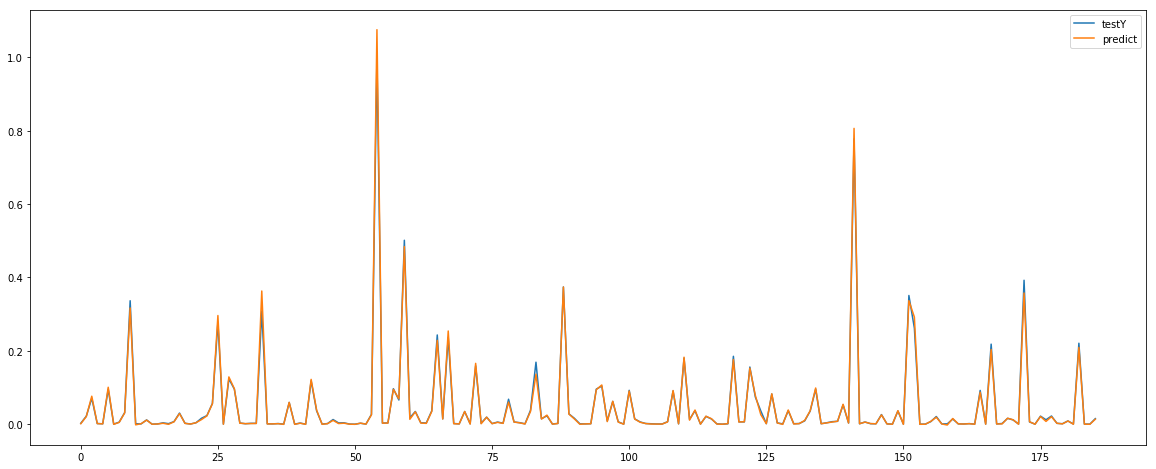

In [19]:
plt.figure(figsize=(20,8))
# Plot predictions
plt.plot(testY, label='testY')
plt.plot(test_predict, label='predict')
plt.legend()
#plt.savefig('./plot/rnn_3000_result')
plt.show()

In [20]:
inv_testY = scalerY.inverse_transform(testY)
inv_test_predict = scalerY.inverse_transform(test_predict)

RMSE: 131114.9885780877


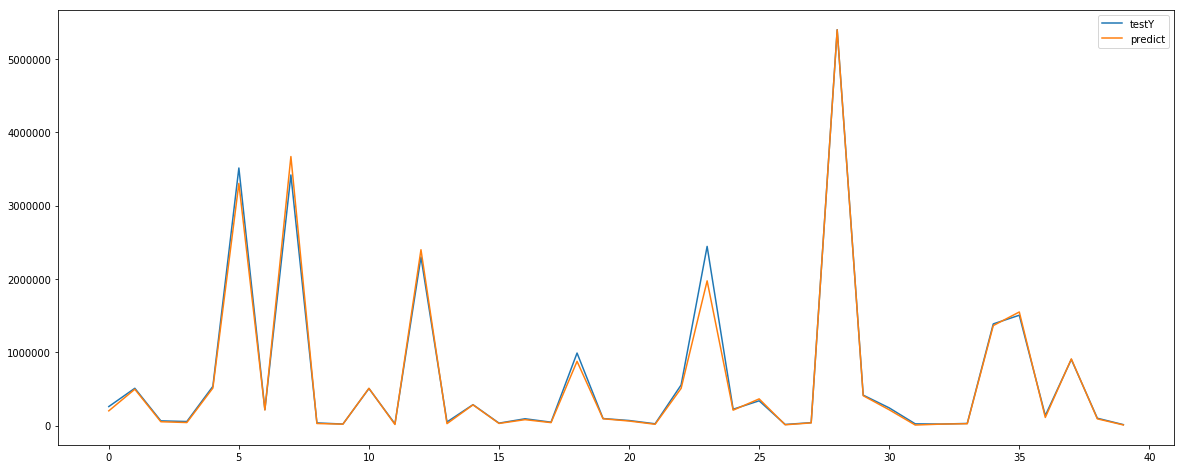

In [21]:
rmse_test = np.sqrt(mean_squared_error(inv_testY, inv_test_predict))

print('RMSE: {}'.format(rmse_test))

slices = slice(60, 100)

plt.figure(figsize=(20,8))
plt.plot(inv_testY[slices], label='testY')
plt.plot(inv_test_predict[slices], label='predict')
plt.legend()
plt.show()